<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#utils" data-toc-modified-id="utils-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>utils</a></span></li></ul></li><li><span><a href="#Load-X-ray-Catalog" data-toc-modified-id="Load-X-ray-Catalog-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load X-ray Catalog</a></span></li><li><span><a href="#Combining-all-data" data-toc-modified-id="Combining-all-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Combining all data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Diagnostics-plots" data-toc-modified-id="Diagnostics-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diagnostics plots</a></span></li><li><span><a href="#Prepare" data-toc-modified-id="Prepare-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#X-ray-only" data-toc-modified-id="X-ray-only-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>X-ray only</a></span><ul class="toc-item"><li><span><a href="#Save-and-Reload" data-toc-modified-id="Save-and-Reload-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Save and Reload</a></span></li></ul></li><li><span><a href="#Dyn+X-ray" data-toc-modified-id="Dyn+X-ray-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Dyn+X-ray</a></span><ul class="toc-item"><li><span><a href="#Save-and-Reload" data-toc-modified-id="Save-and-Reload-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Save and Reload</a></span></li></ul></li><li><span><a href="#Multiband" data-toc-modified-id="Multiband-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Multiband</a></span><ul class="toc-item"><li><span><a href="#Save-and-Reload" data-toc-modified-id="Save-and-Reload-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Save and Reload</a></span></li></ul></li></ul></li><li><span><a href="#Baseline-covariances" data-toc-modified-id="Baseline-covariances-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Baseline covariances</a></span><ul class="toc-item"><li><span><a href="#Calculate-additional-proxies" data-toc-modified-id="Calculate-additional-proxies-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Calculate additional proxies</a></span></li><li><span><a href="#Estimate-scaling-relations-and-covariance" data-toc-modified-id="Estimate-scaling-relations-and-covariance-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Estimate scaling relations and covariance</a></span></li><li><span><a href="#Estimate-scatters" data-toc-modified-id="Estimate-scatters-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Estimate scatters</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Interpretability" data-toc-modified-id="Interpretability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Interpretability</a></span><ul class="toc-item"><li><span><a href="#Plot-examples" data-toc-modified-id="Plot-examples-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Plot examples</a></span></li><li><span><a href="#Test-cluster-cores" data-toc-modified-id="Test-cluster-cores-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Test cluster cores</a></span></li><li><span><a href="#AGN-attention" data-toc-modified-id="AGN-attention-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>AGN attention</a></span></li><li><span><a href="#Multiband-attention" data-toc-modified-id="Multiband-attention-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Multiband attention</a></span></li></ul></li><li><span><a href="#Random-richness" data-toc-modified-id="Random-richness-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Random richness</a></span></li><li><span><a href="#Scratch" data-toc-modified-id="Scratch-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Scratch</a></span><ul class="toc-item"><li><span><a href="#Redshift-dependence" data-toc-modified-id="Redshift-dependence-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Redshift dependence</a></span></li><li><span><a href="#snapshot-tracking" data-toc-modified-id="snapshot-tracking-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>snapshot tracking</a></span></li></ul></li></ul></div>

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os.path import join
import pickle
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy

from collections import defaultdict
from scipy.spatial import KDTree
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
from scipy import ndimage
from scipy.ndimage import zoom
from scipy.spatial.transform import Rotation as R

from sklearn.linear_model import LinearRegression

np.random.seed(46387)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["ytick.right"] = True
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
# mpl.rcParams['text.usetex'] = True

In [4]:
import astropy
from astropy.cosmology import WMAP9, LambdaCDM
from astropy import units
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import Angle, SkyCoord
from astropy.coordinates import ICRS, Galactic
from astropy.cosmology import Planck15 as cosmo

In [5]:
import halo_cnn as hc
from tools.plot_tools import binned_plot
from tools.catalog import Catalog

get_centers = lambda edges: np.array([(edges[i]+edges[i+1])/2. for i in range(len(edges)-1)])
gapper = lambda x: np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))

2023-05-30 18:49:48.111877: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [6]:
# Tensorflow backend
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, Conv2D, Concatenate, MaxPooling2D
from tensorflow.keras.layers import Conv3D, MaxPool3D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [7]:
wdir = '/hildafs/home/mho1/hilda/halo_cnn'
imdir = '/Users/maho/git/dev-halo_cnn/paper_images'

## utils

In [8]:
aperture,vcut = 2.3, 3785.0

snz = {
    96: 0.47019408,
    100: 0.42372720,
    104: 0.37872894,
    108: 0.33515290,
    112: 0.29295412,
    116: 0.25208907,
    120: 0.21251560,
    124: 0.17419289,
    128: 0.13708140,
    132: 0.10114286,
    136: 0.066340191,
}

def cache_data(fname, cache=True):
    def wrap(f):
        def wrapped_f(*args):
            if os.path.exists(fname) & cache:
                print(f'Loading data cache from {fname}')
                return np.load(fname, allow_pickle=True)
            out = f(*args)
            print(f'Saving to {fname}')
            np.save(fname, out, allow_pickle=True)
            return out
        return wrapped_f
    return wrap


def sum_but_first(x):
    return np.sum(x, axis=tuple(range(1,len(x.shape))))

def scale(x):
    return np.log10(x+1)

# Load X-ray Catalog

Everything is saved, no need to run this everytime

In [9]:
aperture = 2.3 # Mpc/h

In [10]:
# All clusters are placed at (10',10') in the sky
# sc = SkyCoord(ra=10.*u.degree, dec=10.0*u.degree, 
#               distance=cosmo.comoving_distance(0.1))
# v = sc.cartesian.xyz.value
# v /= np.linalg.norm(v)

# r1 = R.align_vectors([[0,0,1]],[v])[0].as_matrix()
r2 = R.from_euler('z', -45, degrees=True).as_matrix()
# r = r2@r1 # use the same rotation matrix for all data

r= [[ 0.18792883, -0.07107796, -0.97960741],
    [-0.15518017,  0.98270213, -0.10107242],
    [ 0.96984631,  0.17101007,  0.17364818]]

r= [[ 0.24370973, -0.68611763, -0.68545471],
    [ 0.00192342,  0.70710547, -0.70710547],
    [ 0.96984631,  0.17101007,  0.17364818]]

r = r2@r

r

array([[ 0.17368887,  0.01484064, -0.98468875],
       [-0.17096874,  0.9851575 , -0.0153094 ],
       [ 0.96984631,  0.17101007,  0.17364818]])

In [11]:
def load_Xray_catalog(indir, ebands=[(-np.inf, np.inf)]):
    ### Load cluster metadata
    
    flist = os.listdir(indir)
    flist = [x for x in flist if int(x[5:8]) in  snz] # restrict to only those in our redshifts snz
    
    cldatX = None
    for i, j in tqdm.tqdm(enumerate(flist), total=len(flist)):
        f = join(indir, j,'job.par')
        with open(f, 'r') as file:
            s = file.read()
        s = [x.split(' ') for x in s.split('\n')]

        if cldatX is None:
            cldatX = pd.DataFrame(columns = [x[0] for x in s[:-1]],
                                 index = range(len(flist)))

        cldatX.loc[i] = [x[-1] for x in s[:-1]]

    cldatX['SnapNum'] = cldatX['SnapNum'].apply(lambda x: int(x[5:]))
    cldatX[['csv_x','csv_y','csv_z',
           'csv_vx','csv_vy','csv_vz']] = cldatX[['csv_x','csv_y','csv_z',
                                                 'csv_vx','csv_vy','csv_vz']].astype(float)/1e3
    cldatX['redshift'] = cldatX['SnapNum'].apply(lambda x: snz[x])
    
    
    ### Load photon data, turn into images
    Nbins = 128
    be = np.linspace(-aperture, aperture,Nbins+1)
    imgs = np.zeros((len(flist), Nbins, Nbins, len(ebands)))
    
    for i, f in tqdm.tqdm(enumerate(flist), total=len(flist)):

        fname = join(indir, f, 'phlist.fits')

        hdul = fits.open(fname)
        dat = np.array(hdul[2].data)
        hdul.close()

        z = cldatX['redshift'][i]

        # measure over different energy bands
        for j in range(len(ebands)):
            emin, emax = ebands[j]
            tdat = dat[(emin<=dat['ENERGY']) & (emax>dat['ENERGY'])]
        
            catsc = SkyCoord(ra=tdat['RA']*u.degree, dec=tdat['DEC']*u.degree, 
                             distance=cosmo.comoving_distance(z))

            xyz = r@(catsc.cartesian.xyz.value*cosmo.h) # Mpc -> Mpc/h

            h, xe, ye = np.histogram2d(xyz[0], xyz[1], bins=be)
            imgs[i,...,j] = h
    
    return cldatX, imgs


In [12]:
# Load AGN+ICM
path_to_data = join(
    wdir, 'data_raw/magneticum',
    'MagneticumMatt220319',
    'AGN+ICM'
)
cls_ai, imgs_ai = load_Xray_catalog(path_to_data)

# Load AGN
path_to_data = join(
    wdir, 'data_raw/magneticum',
    'MagneticumMatt220319',
    'AGN_only'
)
cls_a, imgs_a = load_Xray_catalog(path_to_data)

# Load ICM
path_to_data = join(
    wdir, 'data_raw/magneticum',
    'MagneticumMatt220319',
    'ICM_only'
)
cls_i, imgs_i = load_Xray_catalog(path_to_data)

# Load Multiband
path_to_data = join(
    wdir, 'data_raw/magneticum',
    'MagneticumMatt220319',
    'AGN+ICM'
)
cls_aiMB, imgs_aiMB = load_Xray_catalog(path_to_data,
                                        [(0.5,1.2), (1.2,2.0), (2.0,7.0)])

 59%|█████▉    | 1954/3290 [01:07<00:46, 28.84it/s]


KeyboardInterrupt: 

In [ ]:
path_to_data = join(
    wdir, 'data_raw/magneticum',
    'MagneticumMatt220319',
    'AGN+ICM'
)

indir = path_to_data
flist = os.listdir(indir)
flist = [x for x in flist if int(x[5:8]) in  snz]

fname = join(indir, flist[np.random.randint(len(flist))], 'phlist.fits')

hdul = fits.open(fname)
print(hdul[1].data)
dat = np.array(hdul[2].data)
hdul.close()

plt.plot(dat['RA'], dat['DEC'],'.')
plt.plot(10,10,'r+')

In [ ]:
# sort cluster metadata and merge into one

def sort_imgs_by(cls, imgs, by=['csv_snap_id','cluster_id']):
    cls = cls.sort_values(by=by)
    imgs = imgs[cls.index]
    
    return cls.reset_index(drop=True), imgs

cls_ai, imgs_ai = sort_imgs_by(cls_ai, imgs_ai)
cls_a, imgs_a = sort_imgs_by(cls_a, imgs_a)
cls_i, imgs_i = sort_imgs_by(cls_i, imgs_i)
cls_aiMB, imgs_aiMB = sort_imgs_by(cls_aiMB, imgs_aiMB)

def compare_cls(cls_1, cls_2, exclude=None):
    cls_1 = cls_1.drop(exclude, axis=1)
    cls_2 = cls_2.drop(exclude, axis=1)
    
    return np.all(cls_1==cls_2)

if (compare_cls(cls_ai, cls_a, exclude=['jobid','mode']) & 
    compare_cls(cls_ai, cls_i, exclude=['jobid','mode']) & 
    compare_cls(cls_ai, cls_aiMB, exclude=['jobid','mode'])):
    
    cls = cls_ai
else:
    raise Exception('Cluster metadata doesnt match!')

In [ ]:
# remove all things with AGN+ICM images with no pixels

mask = sum_but_first(imgs_ai) > 0
cls = cls[mask].reset_index()

imgs_ai = imgs_ai[mask]
imgs_a = imgs_a[mask]
imgs_i = imgs_i[mask]
imgs_aiMB = imgs_aiMB[mask]

print(np.sum(~ mask), '/', len(mask), 'removed')

In [ ]:
# Plot an example
j = np.random.randint(len(cls))

xa = imgs_a[j]
xi = imgs_i[j]
xai = imgs_ai[j]
xaiMB = imgs_aiMB[j]

f,axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(scale(xai))
axs[0].set_title('AGN+ICM')
axs[1].imshow(scale(xi))
axs[1].set_title('ICM')
axs[2].imshow(scale(xa))
axs[2].set_title('AGN')
axs[3].imshow(scale(xaiMB))
axs[3].set_title('Multiband')

In [ ]:
print_range(imgs_ai.sum(axis=(1,2)), r'\nphot', log=False)
print_range(imgs_i.sum(axis=(1,2)), r'N_\mathrm{ICM}', log=False)
print_range(imgs_a.sum(axis=(1,2)), r'N_\mathrm{AGN}', log=False)

In [ ]:
N_pivot = np.log10(4000)

def normalize_by_redshift(cls, imgs, coef=None, intercept=None):
    x = np.stack([cls['redshift']], axis=1) # redshifts
    y = np.log10(sum_but_first(imgs)) # log photon counts
    
    if (coef is None) or (intercept is None):
        reg = LinearRegression().fit(x,y)
        
        coef, intercept= reg.coef_[0], reg.intercept_

        # print stats
        print(f'coef: {coef:.4f}, intercept: {intercept:.4f}')
        print(f'R^2: {reg.score(x,y):.4f}')
        
        # plot
        plt.plot(x,y,'.')
        x_ = np.linspace(x.min(), x.max(), 10).reshape(-1,1)
        y_ = reg.predict(x_)
        plt.plot(x_, y_, 'r-')
    
    Nm = coef*x + intercept
    imgsN = imgs*10**np.expand_dims((N_pivot - Nm), (1,2))
    return imgsN, coef, intercept

imgsN_ai, coef, intercept = normalize_by_redshift(cls, imgs_ai)
imgsN_a, _, _ = normalize_by_redshift(cls, imgs_a, coef, intercept)
imgsN_i, _, _ = normalize_by_redshift(cls, imgs_i, coef, intercept)
imgsN_aiMB, _, _ = normalize_by_redshift(cls, imgs_aiMB, coef, intercept)

In [ ]:
imgs, imgsN = imgs_ai, imgsN_ai

f,axs = plt.subplots(1,2, sharex=True, sharey=True, 
                     figsize=(10,5), gridspec_kw={'wspace':0,'width_ratios': [3.5,4]})

x = cls['csv_M500_msolh'].astype(float)
y1 = sum_but_first(imgs)
y2 = sum_but_first(imgsN)
c = cls['redshift']

axs[0].loglog()
axs[0].scatter(x,y1, c=c)
scatter = axs[1].scatter(x,y2, c=c)


axs[0].set_xlim(10**13.45,10**15)
plt.colorbar(scatter, label='redshift')
axs[0].set_xlabel('$M_{500c}$', fontsize=14)
axs[1].set_xlabel('$M_{500c}$', fontsize=14)
axs[0].set_ylabel('$N_{photons}$', fontsize=14)

axs[0].set_title('unnormalized')
axs[1].set_title('normalized')

In [ ]:
# Save
cache_dir = join(wdir, 'data_cache')

cls.to_csv(join(cache_dir, 'cls.csv'))

np.save(join(cache_dir, 'imgsN_ai.npy'), imgsN_ai)
np.save(join(cache_dir, 'imgsN_a.npy'), imgsN_a)
np.save(join(cache_dir, 'imgsN_i.npy'), imgsN_i)
np.save(join(cache_dir, 'imgsN_aiMB.npy'), imgsN_aiMB)

# Combining all data

In [ ]:
sndict = {snid: f'Magneticum_sn{snid:03}_z={snz[snid]}_LOS-z_contam.p' for snid in snz.keys()}

sndict

In [ ]:
cache_dir = join(wdir, 'data_cache')

cls = pd.read_csv(join(cache_dir, 'cls.csv'))
imgsX = np.load(join(cache_dir, 'imgsN_ai.npy'))
imgsXa = np.load(join(cache_dir, 'imgsN_a.npy'))
imgsXi = np.load(join(cache_dir, 'imgsN_i.npy'))
imgsXMB = np.load(join(cache_dir, 'imgsN_aiMB.npy'))

# imgsX = np.load('/hildafs/home/mho1/hilda/halo_cnn/data_cache/imgsX.npy')
# imgsXMB = np.load('/hildafs/home/mho1/hilda/halo_cnn/data_cache/imgsXMB.npy')


cat_prop = []
cat_gal = []
cat_ximgs = []
cat_xaimgs = []
cat_xiimgs = []
cat_xmbimgs = []
# cat_simgs = []


for snum in sndict.keys():
    print(snum)
    
    mask = cls['SnapNum']==snum
    ixdat = cls[mask]
    iximgs = imgsX[mask]
    ixaimgs = imgsXa[mask]
    ixiimgs = imgsXi[mask]
    ixmbimgs = imgsXMB[mask]
    
    
    
    icat = Catalog().load(join(wdir, 'data_mocks',sndict[snum]))
    
    
    
    # find dyn-xray
    tree = KDTree(icat.prop[['x','y','z']])
    dds, dinds = tree.query(ixdat[['csv_x','csv_y','csv_z']], p=2)

    print(dds.min(), dds.max())
    
    icat = icat[dinds]
    icat.prop['redshift'] = ixdat['redshift'].iloc[0]
    icat.prop['snid'] = snum
    
    cat_prop.append(icat.prop)
    cat_gal.append(icat.gal)
    cat_ximgs.append(iximgs)
    cat_xaimgs.append(ixaimgs)
    cat_xiimgs.append(ixiimgs)
    cat_xmbimgs.append(ixmbimgs)
#     cat_simgs.append(isimgs)
    

In [ ]:
cat_prop = pd.concat(cat_prop)
cat_gal = np.concatenate(cat_gal, axis=0)
cat_ximgs = np.concatenate(cat_ximgs, axis=0)
cat_xaimgs = np.concatenate(cat_xaimgs, axis=0)
cat_xiimgs = np.concatenate(cat_xiimgs, axis=0)
cat_xmbimgs = np.concatenate(cat_xmbimgs, axis=0)

cat_prop = cat_prop.reset_index(drop=True)

In [ ]:
newcat = Catalog()

newcat.par = icat.par
newcat.prop=cat_prop

newcat.gal=cat_gal
newcat.ximgs=cat_ximgs
newcat.xaimgs=cat_xaimgs
newcat.xiimgs=cat_xiimgs
newcat.xmbimgs=cat_xmbimgs


In [ ]:
#as a sanity check, plot up a few clusters

n=4

aperture = newcat.par['aperture']

mbins = np.linspace(13.5, 14.5, n+1)

f = plt.figure(figsize=(20,20))
gs = mpl.gridspec.GridSpec(4,n, hspace=0.1, wspace=0.1)

ang = 0 # -40

# np.random.seed(656)


for i in range(n):
    mask = (10**mbins[i] <= newcat.prop['m500c'].values) & (newcat.prop['m500c'].values <= 10**mbins[i+1])

    ind = np.random.choice(np.argwhere(mask).flatten())

    # X-ray AGN+ICM
    ax = f.add_subplot(gs[0,i])
    im = newcat.ximgs[ind]
    ax.imshow(ndimage.rotate(scale(im), ang),
              extent=[-aperture,aperture,-aperture,aperture])

    mask = newcat.gal[ind]['memb_halo']
    x = newcat.gal[ind]['xproj']# [mask]
    y = newcat.gal[ind]['yproj']# [mask]
    z = newcat.gal[ind]['zproj']
    
#     Rproj = np.sqrt(x**2+y**2+z**2)
#     mask = Rproj <= 2*newcat.prop['r500c'][ind]/1e3
    mask = newcat.gal[ind]['m_star'] >= 10**10
    x = x[mask]
    y = y[mask]
    ax.plot(x,y,'ro', alpha=0.5)
    
    circle = plt.Circle((0,0), newcat.prop['r500c'][ind]/1e3, color='r', fill=False)
    ax.add_patch(circle)

    ax.set_title(r'$\log\left(\frac{M_\mathrm{500c}}{h^{-1}\,M_\odot}\right) = '
                 f'{np.log10(float(newcat.prop["m500c"][ind])):.3f}$',
                 fontsize=16)
    if i==0:
        ax.set_ylabel('XRAY AGN+ICM', fontsize=16)
        
    # X-ray ICM
    ax = f.add_subplot(gs[1,i])
    im = newcat.xiimgs[ind]
    ax.imshow(ndimage.rotate(scale(im), ang),
              extent=[-aperture,aperture,-aperture,aperture])
    if i==0:
        ax.set_ylabel('XRAY ICM', fontsize=16)
        
    # X-ray AGN
    ax = f.add_subplot(gs[2,i])
    im = newcat.xaimgs[ind]
    ax.imshow(ndimage.rotate(scale(im), ang),
              extent=[-aperture,aperture,-aperture,aperture])
    if i==0:
        ax.set_ylabel('XRAY AGN', fontsize=16)
    
    
    # X-ray Multiband
    ax = f.add_subplot(gs[3,i])
    im = newcat.xmbimgs[ind]
    ax.imshow(ndimage.rotate(scale(im), ang), 
              extent=[-aperture,aperture,-aperture,aperture])
    if i==0:
        ax.set_ylabel('XRAY MULTIBAND', fontsize=16)
    
# plt.tight_layout()
# plt.savefig('temp/mag_xraysz.png')

In [ ]:
newcat.save(join(wdir, 'data_mocks', 'Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p'))

# Preprocessing

In [9]:
catalog_name = 'Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p'
reweight=False

# Global parameters
nfolds = 10
epochs = 200


In [10]:
fname = join(wdir,'data_mocks',catalog_name)
with open(fname, 'rb') as in_file:
    catalog = pickle.load(in_file)

aperture = catalog.par['aperture']
vcut = catalog.par['vcut']

# Initialize data manager
data_manager = hc.data.GaussManager(
    input_shape=(64,64,64),
    bandwidth=0.15,
    nfolds=nfolds,
    mass_range_train=(None, None), # full range of masses
    mass_range_test=(None, None),
    dn_dlogm=(10.**-6), # 10.**-6.3, 
    dlogm=0.01, val_split=0.,
    volume=(1e9,),
    vcut = catalog.par['vcut'],
    aperture = catalog.par['aperture']
)
    
fname = join(wdir, 'data_cache',
             f'proc_{catalog_name}.npy')
@cache_data(fname, cache=True)
def gen():
    pdfs = data_manager.generate_pdfs(catalog, ['xproj', 'yproj', 'vlos'], 
                                      n_proc=10, )    
    return pdfs

pdfs = gen()

Loading data cache from /hildafs/home/mho1/hilda/halo_cnn/data_cache/proc_Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p.npy


# Diagnostics plots

In [ ]:
def print_range(x, name, log=False, around=0):
    if log:
        x = np.log10(x)
    def tfrlog(t):
        if log:
            t = f'\\log_{{10}}\\left[{t}\\right]'
        return f'${t}$'
    def tfr(t):
        if around < 0:
            return f'${t:.{-around}f}$'
        if t>1e5:
            return f'${t/1e5:.2f}\\times 10^{{5}}$'
        return f'${int(np.around(t, decimals=-around))}$'
    print(' & '.join([tfrlog(name), tfr(x.min()), tfr(np.median(x)), tfr(x.max())]) + '\\\\')

print_range(catalog.prop['m500c'], r'\mfhc\ (\hmsun)', log=True, around=-2)
print_range(catalog.prop['redshift'], r'z', log=False, around=-2)
print('')
print_range(catalog.prop['Ngal'], r'\ngal', log=False)
          
# See Load X-ray Catalog for the other three
# print_range(imgs_ai.sum(axis=(1,2)), r'\nphot', log=False)
# print_range(imgs_i.sum(axis=(1,2)), r'N_\mathrm{ICM}', log=False)
# print_range(imgs_a.sum(axis=(1,2)), r'N_\mathrm{AGN}', log=False)

In [ ]:
#as a sanity check, plot up a few clusters

n=5

aperture = 2.3

mbins = np.linspace(13.5, 15, n+1)

f = plt.figure(figsize=(n*4,13))
gs = mpl.gridspec.GridSpec(3,n+1, width_ratios=[15]*n+[1], hspace=0.15, wspace=0.1)

for i in range(n):
    for j, snum in enumerate([132,116,100]):
        mask = ((10**mbins[i] <= catalog.prop['m500c']) & 
                (catalog.prop['m500c'] <= 10**mbins[i+1]))
        mask *= (catalog.prop['snid'] == snum).values

        ind = np.random.choice(np.argwhere(mask.values).flatten())

        # X-ray
        ax = f.add_subplot(gs[j,i])

        img = catalog.ximgs[ind]

        im = ax.imshow(np.rot90(img+1e-4), 
                       norm=mcolors.LogNorm(vmin=10**0, vmax=10**2.5),
                       interpolation='none',cmap='magma',
                       extent=[-aperture,aperture,-aperture,aperture])
        
        circle = plt.Circle((0,0), float(catalog.prop['r500c'][ind])/1e3, color='r', fill=False)
        ax.add_patch(circle)

        ax.set_title(r'$\log\left(M_\mathrm{500c}\right) = '
                     f'{np.log10(float(catalog.prop["m500c"][ind])):.3f}$',
                     fontsize=18)
        if i==0:
            ax.set_ylabel(f'z={snz[snum]:.3f}', fontsize=14)

cax = f.add_subplot(gs[:,-1])
cb = f.colorbar(im,  cax=cax, orientation='vertical', extend='both')
cb.set_label('Redshift-normalized Photon Counts',fontsize=14,
             rotation=270, labelpad=20)

    
# plt.savefig('paper_xray/xray_ex.pdf',bbox_inches='tight')

In [ ]:
i = 1655 # np.random.randint(len(pdfs))

data = scale(catalog.ximgs[i][...,0])

f, axs = plt.subplots(1,4, figsize=(12,3))
axs[0].imshow(data, 
              extent=[-aperture,aperture,-aperture,aperture])

x = catalog.gal[i]['xproj']
y = catalog.gal[i]['yproj']
# axs[0].plot(x,y,'r.', alpha=0.2)

axs[1].imshow(np.rot90(np.sum(pdfs[i,...], axis=0)), 
              extent=[-aperture,aperture,-aperture,aperture])

x = catalog.gal[i]['xproj']
y = catalog.gal[i]['yproj']
# axs[1].plot(x,y,'r.')

axs[2].imshow(np.rot90(np.sum(pdfs[i,...], axis=2).T, k=1), 
              extent=[-aperture,aperture, -vcut,vcut])

x = catalog.gal[i]['xproj']
y = catalog.gal[i]['vlos']
axs[2].plot(x,y,'r.')
axs[2].set_aspect(aperture/vcut)


axs[3].imshow(np.rot90(np.sum(pdfs[i,...], axis=1).T, k=1), 
              extent=[-aperture,aperture, -vcut,vcut])

x = catalog.gal[i]['yproj']
y = catalog.gal[i]['vlos']
axs[3].plot(x,y,'r.')
axs[3].set_aspect(aperture/vcut)


print(catalog.prop.loc[i,['redshift', 'm500c']])

In [ ]:
## hide plot stuff

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm


# create the figure
fig = plt.figure(figsize=(8,8))
gs = mpl.gridspec.GridSpec(4, 1, hspace=0, height_ratios=[1,1,1,1.4])

## ~~~ PLOT MULTIBAND ~~~
ax = fig.add_subplot(gs[:3,0], 
                     projection='3d', proj_type='ortho',
                     adjustable='datalim'
                    )
plt.axis('off')

x = np.linspace(-1,1, 128)
X,Y = np.meshgrid(x,x)
Z = np.ones(X.shape)*1

data = np.rot90(scale(catalog.xmbimgs[i][...,0]).T, k=1)
norm = mpl.colors.Normalize(vmin=0, vmax=data.max()/2)
cmap = plt.cm.magma
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)
ax.text(-1.625*1, 1*7/8, -0.25*1, 
        s='Soft Band\n(0.5-2.0 keV)', 
        zdir=(0,0,1), fontsize=7, va='center', ma='center')


x = np.linspace(-1, 1, 128)
X,Y = np.meshgrid(x,x)
Y -= 2.5*1
Z = np.ones(X.shape)*1

data = np.rot90(scale(catalog.xmbimgs[i][...,1]), k=2)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)
ax.text(-1.625*1, 1*7/8, -2.75*1, 
        s='Medium Band\n(1.2-2.0 keV)', 
        zdir=(0,0,1), fontsize=7, va='center', ma='center')



x = np.linspace(-1, 1, 128)
X,Y = np.meshgrid(x,x)
Y -= 5*1
Z = np.ones(X.shape)*1

data = np.rot90(scale(catalog.xmbimgs[i][...,2]), k=2)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)
ax.text(-1.625*1, 1*7/8, -5.25*1, 
        s='Hard Band\n(2.0-7.0 keV)', 
        zdir=(0,0,1), fontsize=7, va='center', ma='center')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-5, 2)
ax.set_box_aspect((2,2,7))

cmap_a = cmap
norm_a = norm


## ~~~ PLOT DYNAMICAL ~~~
ax = fig.add_subplot(gs[3,0], 
                     projection='3d', proj_type='ortho',
                     adjustable='datalim'
                    )

meshcube = data_manager._build_mesh(['xproj','yproj','vlos'])
meshcube[...,0]/=data_manager.aperture
meshcube[...,1]/=data_manager.aperture
meshcube[...,2]/=data_manager.vcut
meshcube[...,1]-= 8*1

norm = mpl.colors.Normalize(vmin=0, vmax=4e-3)
cmap = plt.cm.viridis
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)


X = meshcube[0,:,:,0]+0.025
Y = meshcube[0,:,:,1]
Z = meshcube[0,:,:,2]-0.075
data = np.sum(pdfs[i,...], axis=0)
colors = cmap(norm(data))
ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)

X = meshcube[:,-1,:,0]+0.075
Y = meshcube[:,-1,:,1]
Z = meshcube[:,-1,:,2]
data = np.sum(pdfs[i,...], axis=1)
colors = cmap(norm(data))
ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)

X = meshcube[:,:,-1,0]
Y = meshcube[:,:,-1,1]
Z = meshcube[:,:,-1,2]+0.05
data = np.sum(pdfs[i,...], axis=2)
colors = cmap(norm(data))
temp = ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)
ax.text(-1.5*1, -1*7/8, -8.25*1, 
        s='Dynamical', 
        zdir=(0,0,1), fontsize=7, va='center')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-9, -7)
ax.set_box_aspect((2,2,2))

ax.plot([-0.9,1],[-1]*2, [-7]*2, 'k', linewidth=5)
ax.plot([1]*2,[-1]*2, [-7,-8.95], 'k', linewidth=5)
ax.plot([1.05]*2, [-1,0.9], [-7]*2, 'k', linewidth=5)

ax.tick_params(axis='both', which='major', labelsize=7, pad=0.05)
ax.set_xlabel(r'$x_\mathrm{proj}\ (h^{-1}\mathrm{Mpc})$', fontsize=7,labelpad=0.02)
ax.set_ylabel(r'$v_\mathrm{los}\ (\times 10^3\ \mathrm{s}^{-1}\mathrm{km})$', fontsize=7,labelpad=0.02)
ax.set_zlabel(r'$y_\mathrm{proj}\ (h^{-1}\mathrm{Mpc})$', fontsize=7,labelpad=0.02)
ax.set_xticks(ticks=[-2/2.3,0,2/2.3])
ax.set_xticklabels(labels=[-2.,0,2.])
ax.set_yticks(ticks=[-3000/3785,0,3000/3785])
ax.set_yticklabels(labels=[-3.,0,3.])
ax.set_zticks(ticks=[-8-2/2.3,-8,-8+2/2.3])
ax.set_zticklabels(labels=[-2.,0,2.])

## ~~~ PLOT ARROW ~~~
# ax.plot(2*[1.1*1],2*[-1.1*1],[-10*1,-9*1],'r-')
# ax.quiver(1.5*1,-1,-10*1, 0, 2*1, 0, 
#           arrow_length_ratio=0.2, 
#           color='r')

## ~~~ MAKE COLORBARS ~~~
cax = fig.add_axes([0.65, 0.45, 0.01, 0.275])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_a, cmap=cmap_a),
                    fraction=0.01, 
                    pad=-0.15,
                    cax=cax)
cbar.ax.tick_params(labelsize=4)
cbar.set_label(label=r'$\log_{10}\left[N_\mathrm{phot}+1\right]$', fontsize=7)

cax = fig.add_axes([0.7, 0.2, 0.01, 0.175])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                    format='%.0e',
                    fraction=0.01, 
                    pad=-5,
                    anchor=(-5,0),
                    cax=cax)
cbar.ax.tick_params(labelsize=4)
cbar.set_label(label='KDE PDF', fontsize=7)


## ~~~ SAVE ~~~
bbox = fig.bbox_inches.from_bounds(3,0.6,3.2,6)
fig.savefig('paper_xray/ex_multiband.pdf', bbox_inches=bbox)

In [ ]:
i = 3150 # np.random.randint(len(pdfs))

## hide plot stuff

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm


# create the figure
fig = plt.figure(figsize=(4,4))
gs = mpl.gridspec.GridSpec(1,1)

## ~~~ PLOT MULTIBAND ~~~
ax = fig.add_subplot(gs[0,0], 
                     projection='3d', proj_type='ortho',
                     adjustable='datalim'
                    )
plt.axis('off')


## ~~~ PLOT DYNAMICAL ~~~
meshcube = data_manager._build_mesh(['xproj','yproj','vlos'])
meshcube[...,0]/=data_manager.aperture
meshcube[...,1]/=data_manager.aperture
meshcube[...,2]/=data_manager.vcut
meshcube[...,1]-= 9*1

norm = mpl.colors.Normalize(vmin=0, vmax=4e-3)
cmap = plt.cm.viridis
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

X = meshcube[0,:,:,0]
Y = meshcube[0,:,:,1]
Z = meshcube[0,:,:,2]
data = np.sum(pdfs[i,...], axis=0)
colors = cmap(norm(data))
ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)

X = meshcube[:,-1,:,0]
Y = meshcube[:,-1,:,1]
Z = meshcube[:,-1,:,2]
data = np.sum(pdfs[i,...], axis=1)
colors = cmap(norm(data))
ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)

X = meshcube[:,:,-1,0]
Y = meshcube[:,:,-1,1]
Z = meshcube[:,:,-1,2]
data = np.sum(pdfs[i,...], axis=2)
colors = cmap(norm(data))
temp = ax.plot_surface(X, Z, Y, facecolors=colors, shade=False)
# ax.text(-1.5*1, -1*7/8, -9.25*1, 
#         s='Dynamical', 
#         zdir=(0,0,1), fontsize=7, va='center')

# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
# ax.set_zlim(-10*1, 1)
# ax.set_box_aspect((2,2,10))


## ~~~ PLOT ARROW ~~~
# ax.plot(2*[1.1*1],2*[-1.1*1],[-10*1,-9*1],'r-')
ax.quiver(1.5*1,-1,-10*1, 0, 2*1, 0, 
          arrow_length_ratio=0.2, 
          color='r')

## ~~~ MAKE COLORBARS ~~~
cax = fig.add_axes([0.775, 0.45, 0.02, 0.25])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                    format='%.0e',
                    fraction=0.01, 
                    pad=-5,
                    anchor=(-5,0),
                    cax=cax)
cbar.ax.tick_params(labelsize=4)
cbar.set_label(label='KDE PDF', fontsize=7)


## ~~~ SAVE ~~~
# bbox = fig.bbox_inches.from_bounds(3,1.125,2.25,5.5)
fig.savefig('paper_xray/dyn_cube.pdf', bbox_inches='tight')

In [ ]:
# i = np.random.randint(len(pdfs))

## hide plot stuff

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm


# create the figure
fig = plt.figure(figsize=(4,4))
gs = mpl.gridspec.GridSpec(1,1)

## ~~~ PLOT MULTIBAND ~~~
ax = fig.add_subplot(gs[0,0], 
                     projection='3d', proj_type='ortho',
                     adjustable='datalim'
                    )
plt.axis('off')

x = np.linspace(-1,1, 128)
X,Y = np.meshgrid(x,x)
Z = np.ones(X.shape)*-1

data = np.rot90(scale(catalog.xmbimgs[i][...,0]).T, k=1)
norm = mpl.colors.Normalize(vmin=0, vmax=data.max()/2)
cmap = plt.cm.magma
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)


x = np.linspace(-1, 1, 128)
X,Y = np.meshgrid(x,x)
Z = np.ones(X.shape)*-1
Z -= .25*1

data = np.rot90(scale(catalog.xmbimgs[i][...,1]), k=2)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)



x = np.linspace(-1, 1, 128)
X,Y = np.meshgrid(x,x)
Z = np.ones(X.shape)*-1
Z -= 0.5

data = np.rot90(scale(catalog.xmbimgs[i][...,2]), k=2)
colors = cmap(norm(data))
ax.plot_surface(X, Z,Y, facecolors=colors, shade=False)

# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
# ax.set_zlim(-10*1, 1)
# ax.set_box_aspect((2,2,10))


## ~~~ MAKE COLORBARS ~~~
cax = fig.add_axes([0.85, 0.45, 0.02, 0.25])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_a, cmap=cmap_a),
                    fraction=0.01, 
                    pad=-0.15,
                    cax=cax)
cbar.ax.tick_params(labelsize=4)
cbar.set_label(label=r'$\log_{10}\left[N_\mathrm{phot}+1\right]$', fontsize=7)


## ~~~ SAVE ~~~
# bbox = fig.bbox_inches.from_bounds(3,1.125,2.25,5.5)
fig.savefig('paper_xray/xray_flat.pdf', bbox_inches='tight')

# Prepare

In [11]:
# Gather data
X1 = np.copy(pdfs)[...,None] # dynamical
X2 = np.copy(catalog.ximgs) # x-ray
X3 = np.copy(catalog.xmbimgs) # x-ray multiband
X4 = np.copy(catalog.xaimgs) # x-ray AGN

# Normalize
X2 = scale(X2) # log10(x+1)
X3 = scale(X3)
X4 = scale(X4)

X1 = (X1-X1.mean())/X1.std()
X2 = (X2-X2.mean())/X2.std()
X3 = (X3-X3.mean())/X3.std()
X4 = (X4-X4.mean())/X4.std()

# Rotate to same orientation
X1 = X1
X2 = np.rot90(X2, k=-1, axes=(1,2))
X3 = np.rot90(X3, k=-1, axes=(1,2))
X4 = np.rot90(X4, k=-1, axes=(1,2))

Ydr = np.log10(catalog.prop['m500c'].values)
Y = data_manager.regularize(Ydr, use_cache=False)

fname = join(wdir, 'data_cache',
             f'fold_{catalog_name}.npy')
@cache_data(fname, cache=True)
def gen():
    return np.random.randint(0,nfolds,size=len(Y))
fold = gen()

Loading data cache from /hildafs/home/mho1/hilda/halo_cnn/data_cache/fold_Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p.npy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


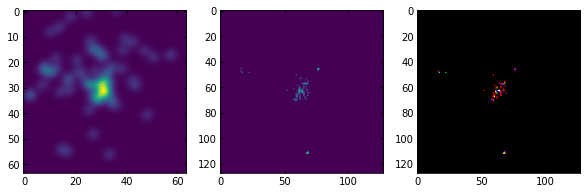

In [12]:
f,axs = plt.subplots(1,3, figsize=(10,3))

i = np.random.randint(len(X1))
axs[0].imshow(np.sum(X1[i,...,-1], axis=0))
axs[1].imshow(X2[i])
axs[2].imshow(X3[i])

In [13]:
Nsplit = 2
L = 352
Lsplit = L/Nsplit

temp = catalog.prop[['x','y','z']].values//Lsplit
_, fold = np.unique(temp, axis=0, return_inverse=True)
nfolds = len(np.unique(fold))

# Training

In [14]:
runs = defaultdict(dict)

## X-ray only

In [15]:
# Naming
model_type = 'multiwav'
model_name = 'xray-quad_221221'
model_dir = os.path.join(wdir, 'saved_models', model_type, model_name)

# Global parameters
# nfolds = 10
epochs = 200

dropout_p = 0.1 # dropout probability

In [16]:
decay = 1e-4
lr = 1e-3
p = 1e-1

def make_model():
    in2 = Input(shape=(*(128,128),1)) # *(X2.shape[1:-1]),1))

    x2 = Conv2D(filters=24, kernel_size=(5,5), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)
#     x2 = Dropout(p)(x2)

    x = x2

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
#     x = Dropout(p)(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
#     x = Dropout(p)(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=in2, outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_squared_error', optimizer=opt,
                  metrics=['mean_squared_error'])
    
    return model

2023-05-30 19:03:58.063573: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-30 19:03:58.177871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-05-30 19:03:58.178398: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-30 19:03:58.392472: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-30 19:03:58.392543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-05-30 19:03:58.411646: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

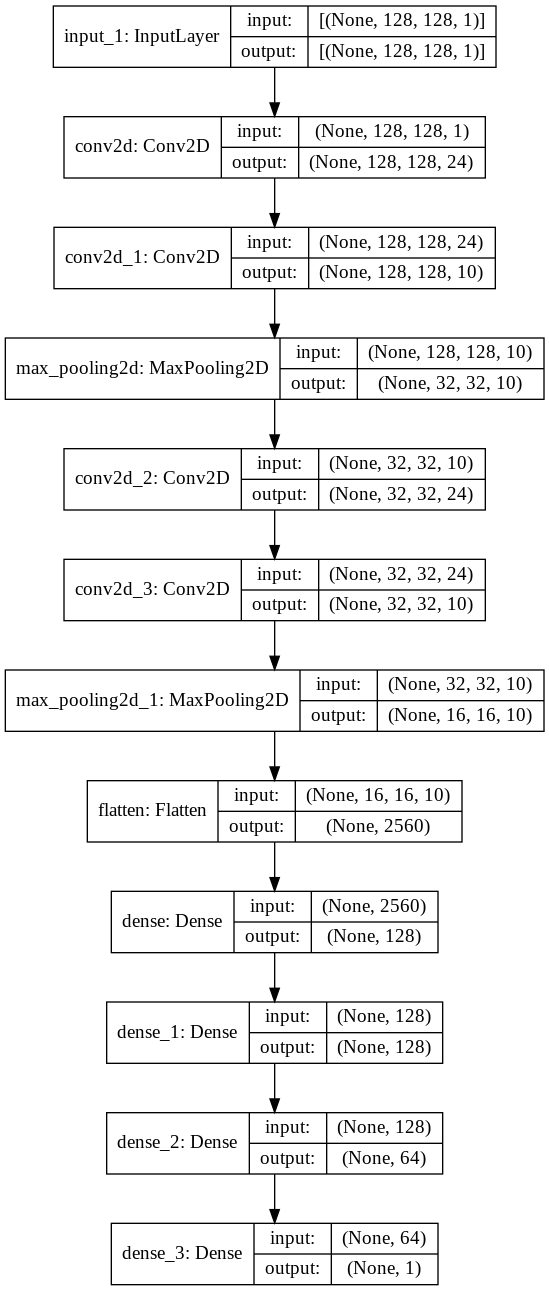

In [17]:
model = make_model()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
models = [None]*nfolds
histories = [None]*nfolds


for i in range(nfolds):
    print('Fold:', i)
    models[i] = make_model()

    cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=20,
        restore_best_weights=True
    )
    mask = fold!=i
    trval = np.random.rand(len(mask))<0.9
    X_train = X2[mask & trval]
    Y_train = Y[mask & trval]
    X_val = X2[mask & ~trval]
    Y_val = Y[mask & ~trval]

    histories[i] = models[i].fit(X_train, 
                                 Y_train,
                                 validation_data = ((X_val,
                                                     Y_val)),
                                 batch_size=50,
                                 epochs=epochs,
                                 callbacks = [cb],
                                 verbose=2).history

In [ ]:
# Plot loss
f = plt.figure(figsize=(5,3))

ax = f.add_subplot()
ax.semilogy()

x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
# x_ = [len()]
y_ = np.concatenate([histories[i]['loss'] for i in range(nfolds)])

_ = binned_plot(x_, y_,
                n=20, percentiles=[0], 
                color='g', ax=ax, label='training')
_ = binned_plot(x_, y_,
                n=20, percentiles=[35,45], 
                color='g', ax=ax)

if 'val_loss' in histories[0]:
    x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
    y_ = np.concatenate([histories[i]['val_loss'] for i in range(nfolds)])

    _ = binned_plot(x_, y_,
                    n=20, percentiles=[0], 
                    color='y', ax=ax, label='validation')
    _ = binned_plot(x_, y_,
                    n=20, percentiles=[35,45], 
                    color='y', ax=ax)

# ax.set_xticks(np.arange(epochs)+1)
ax.set_xlim(1, epochs)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(ncol=2)

In [ ]:
pred = np.zeros(shape=(len(Y)))
        
for i in range(nfolds):
    # Load test inputs

    # Predict on test inputs
    Y_pred_fold = models[i].predict(X2[fold==i])

    place_inds = np.where(fold==i)[0]
    for j in range(len(place_inds)):
        pred[place_inds[j]] = Y_pred_fold[j]
        
pred = data_manager.deregularize(pred)

In [ ]:
f, ax = plt.subplots()

x = Ydr
y = pred

plt.plot(range(13,16), range(13,16), 'k--')
plt.plot(x, y, '.', alpha=0.04)

binned_plot(x,y, percentiles=[0], label='MDPL2',
            n=40, color='y', ax=ax)
binned_plot(x,y, percentiles=[34], 
            n=40, color='y', ax=ax)

plt.xlim(13.5,14.8)
plt.ylim(13.5,14.8)
plt.xlabel(r'$\log_{10} [M_\mathrm{true}]$', fontsize=14)
plt.ylabel(r'$\log_{10} [M_\mathrm{pred}]$', fontsize=14)

In [ ]:
np.std(y-x)

In [ ]:
i = np.random.choice(np.argwhere(fold==0).flatten())# 518# i = np.random.randint(len(X2))
print(i, fold[i])

images = tf.Variable(X2[i:i+1], dtype=float)

def get_grad_eval(im):
    
    with tf.GradientTape() as tape:
        pred = models[fold[i]](images, training=False)
        loss = pred[0]
    
    grads = tape.gradient(loss, im)

    dgrad_abs = tf.math.abs(grads)[0]
    arr_min, arr_max  = np.min(dgrad_abs), np.max(dgrad_abs)
    grad_eval = (dgrad_abs - arr_min) / (arr_max - arr_min + 1e-18)
    
    return grad_eval

f,axs = plt.subplots(2,1, figsize=(5,9))

aperture = catalog.par['aperture']
axs[0].imshow(X2[i], extent=[-aperture,aperture, -aperture, aperture])
circle = plt.Circle((0,0), catalog.prop['r500c'][i]/1e3, color='r', fill=False)
axs[0].add_patch(circle)

axs[1].imshow(get_grad_eval(images), extent=[-aperture,aperture, -aperture, aperture])
circle = plt.Circle((0,0), catalog.prop['r500c'][i]/1e3, color='r', fill=False)
axs[1].add_patch(circle)


axs[0].set_title(f'X-ray, $M_{{true}} = {Ydr[i]:.3f}$', fontsize=14)
axs[0].set_ylabel(r'$x$', fontsize=16)
axs[1].set_ylabel(r'|$\nabla f(x)|$', fontsize=16)


# f.savefig('temp/Xray-attention.png', dpi=400)

### Save and Reload

In [ ]:
# Save local
runs['xray'] = {'name': 'xray',
               'models': models,
               'histories': histories,
               'pred': pred,
              }

In [ ]:
# Save external
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

for i in range(len(models)):
    models[i].save_weights(os.path.join(model_dir, 
                                        model_name+f'_fold{i}_model.h5'))

np.save(os.path.join(model_dir, model_name+'_pred.npy'), 
        pred)

In [18]:
# Load external
runs['xray']['models'] = [make_model() for _ in range(nfolds)]

for i in range(nfolds):
    runs['xray']['models'][i].load_weights(os.path.join(model_dir, model_name+f'_fold{i}_model.h5'))
    
runs['xray']['pred'] = np.load(os.path.join(model_dir, model_name+'_pred.npy'))

/hildafs/home/mho1/.conda/envs/jupy-gpu/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
# Load local
models = runs['xray']['models']
pred = runs['xray']['pred']

## Dyn+X-ray

In [20]:
# Naming
model_type = 'multiwav'
model_name = 'dynxray-split_221221'
model_dir = os.path.join(wdir, 'saved_models', model_type, model_name)

# Global paarameters
# nfolds = 10
epochs = 200

dropout_p = 0.1 # dropout probability

In [21]:
decay = 1e-4
lr = 1e-3
p=1e-1

def make_model():
    in1 = Input(shape=(64,64,64,1))# X1.shape[1:])
    in2 = Input(shape=(*(128,128),1)) # (*(X2.shape[1:-1]),1))

    x1 = Conv1D(filters=24, kernel_size=5, padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in1)
    x1 = Conv1D(filters=10, kernel_size=3, padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = Flatten()(x1)
    x1 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x1)

    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), strides=(2,2), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)

    x = Concatenate()([x1,x2])

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=[in1,in2], outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_squared_error', optimizer=opt,
                  metrics=['mean_squared_error'])
    return model


def make_model():
    in1 = Input(shape=(64,64,64,1))# X1.shape[1:])
    in2 = Input(shape=(*(128,128),3)) # (*(X2.shape[1:-1]),1))


    in2big = tf.keras.layers.AveragePooling2D((2,2))(in2)
    in2big = tf.expand_dims(in2big, axis=3)
    in2big = tf.repeat(in2big, 64, axis=3)


    infull = tf.concat([in1, in2big], axis=-1)
    
    x1 = Conv3D(filters=24, kernel_size=5, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(infull)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    x1 = Conv3D(filters=16, kernel_size=3, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    x1 = Conv3D(filters=8, kernel_size=1, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    
    x1 = Flatten()(x1)
    x1 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x1)
    x1 = Dropout(p)(x1)
    
    
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), strides=(2,2), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)
    x2 = Dropout(p)(x2)

    x = Concatenate()([x1,x2])
#     x = x1

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=[in1,in2], outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_squared_error', optimizer=opt,
                  metrics=['mean_squared_error'])
    return model


In [22]:
model = make_model()
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
average_pooling2d (AveragePooli (None, 64, 64, 3)    0           input_11[0][0]                   
__________________________________________________________________________________________________
tf.expand_dims (TFOpLambda)     (None, 64, 64, 1, 3) 0           average_pooling2d[0][0]          
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 64, 64, 64,  0                                            
____________________________________________________________________________________________

In [ ]:
tf.keras.utils.plot_model(
    model, 
    show_shapes=True,
    to_file='paper_xray/3D_arch.pdf'
)

In [ ]:

models = [None]*nfolds
histories = [None]*nfolds

epochs=400

for i in range(nfolds):
    print('Fold:', i)
    
    fname = os.path.join(model_dir, model_name+f'_fold{i}_model.h5') 
    models[i] = make_model()
    if os.path.exists(fname):
        pass
#         models[i].load_weights(fname)
#         continue

    cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=20,
        restore_best_weights=True
    )
    
    histories[i] = models[i].fit([X1[fold!=i], X3[fold!=i]], 
                                 Y[fold!=i],
                                 validation_data = (([X1[fold==i], X3[fold==i]],
                                        Y[fold==i])),
                                 batch_size=100,
                                 epochs=epochs,
                                 callbacks=[cb],
                                 verbose=1).history
    
    models[i].save_weights(fname)

In [ ]:
# Plot loss
f = plt.figure(figsize=(5,3))

ax = f.add_subplot()
ax.semilogy()

x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
# x_ = [len()]
y_ = np.concatenate([histories[i]['loss'] for i in range(nfolds)])

_ = binned_plot(x_, y_,
                n=20, percentiles=[0], 
                color='g', ax=ax, label='training')
_ = binned_plot(x_, y_,
                n=20, percentiles=[35,45], 
                color='g', ax=ax)

if 'val_loss' in histories[0]:
    x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
    y_ = np.concatenate([histories[i]['val_loss'] for i in range(nfolds)])

    _ = binned_plot(x_, y_,
                    n=20, percentiles=[0], 
                    color='y', ax=ax, label='validation')
    _ = binned_plot(x_, y_,
                    n=20, percentiles=[35,45], 
                    color='y', ax=ax)

# ax.set_xticks(np.arange(epochs)+1)
ax.set_xlim(1, epochs)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(ncol=2)

In [ ]:
pred = np.zeros(shape=(len(Y)))
        
for i in range(nfolds):
    print(i)

    # Predict on test inputs
    Y_pred_fold = models[i].predict([X1[fold==i], X3[fold==i]])

    place_inds = np.where(fold==i)[0]
    for j in range(len(place_inds)):
        pred[place_inds[j]] = Y_pred_fold[j]
        
pred = data_manager.deregularize(pred)

In [ ]:
f, ax = plt.subplots()

x = Ydr
y = pred

plt.plot(range(13,16), range(13,16), 'k--')
plt.plot(x, y, '.', alpha=0.04)

binned_plot(x,y, percentiles=[0], label='MDPL2',
            n=40, color='y', ax=ax)
binned_plot(x,y, percentiles=[34], 
            n=40, color='y', ax=ax)

plt.xlim(13.5,14.8)
plt.ylim(13.5,14.8)
plt.xlabel(r'$\log_{10} [M_\mathrm{true}]$', fontsize=14)
plt.ylabel(r'$\log_{10} [M_\mathrm{pred}]$', fontsize=14)

In [ ]:
np.std(y-x)

In [ ]:
plt.hist(np.log((y-x)**2))

### Save and Reload

In [ ]:
# Save local
runs['multi'] = {'name': 'Multiwavelength',
               'models': models,
               'histories': histories,
               'pred': pred,
              }

In [ ]:
# Save external
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

for i in range(len(models)):
    models[i].save_weights(os.path.join(model_dir, 
                                        model_name+f'_fold{i}_model.h5'))

np.save(os.path.join(model_dir, model_name+'_pred.npy'), 
        pred)

In [23]:
# Load external
runs['multi']['models'] = [make_model() for _ in range(nfolds)]

for i in range(nfolds):
    runs['multi']['models'][i].load_weights(os.path.join(model_dir, model_name+f'_fold{i}_model.h5'))
    
runs['multi']['pred'] = np.load(os.path.join(model_dir, model_name+'_pred.npy'))

In [24]:
# Load local
models = runs['multi']['models']
# histories = runs['multi']['histories']
pred = runs['multi']['pred']

## Multiband

In [25]:
# Naming
model_type = 'multiwav'
model_name = 'xrayMB-quad_101222'
model_dir = os.path.join(wdir, 'saved_models', model_type, model_name)

# Global parameters
# nfolds = 10
epochs = 200

dropout_p = 0.1 # dropout probability

In [26]:
decay = 1e-4
lr = 1e-3
p = 1e-1

# Global parameters
# nfolds = 10
epochs = 200

dropout_p = 0.1 # dropout probability

def make_model():
    in2 = Input(shape=(*(128,128),3))

    x2 = Conv2D(filters=24, kernel_size=(5,5), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)
    x2 = Dropout(p)(x2)

    x = x2

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=in2, outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_absolute_error', optimizer=opt,
                  metrics=['mean_absolute_error'])
    
    return model

In [ ]:
models = [None]*nfolds
histories = [None]*nfolds


for i in range(nfolds):
    print('Fold:', i)
    models[i] = make_model()

    cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=20,
        restore_best_weights=True
    )
    mask = fold!=i
    trval = np.random.rand(len(mask))<0.9
    X_train = X3[mask & trval]
    Y_train = Y[mask & trval]
    X_val = X3[mask & ~trval]
    Y_val = Y[mask & ~trval]

    histories[i] = models[i].fit(X_train, 
                                 Y_train,
                                 validation_data = ((X_val,
                                                     Y_val)),
                                 batch_size=50,
                                 epochs=epochs,
                                 callbacks = [cb],
                                 verbose=2).history


In [ ]:
# Plot loss
f = plt.figure(figsize=(5,3))

ax = f.add_subplot()
ax.semilogy()

x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
# x_ = [len()]
y_ = np.concatenate([histories[i]['loss'] for i in range(nfolds)])

_ = binned_plot(x_, y_,
                n=20, percentiles=[0], 
                color='g', ax=ax, label='training')
_ = binned_plot(x_, y_,
                n=20, percentiles=[35,45], 
                color='g', ax=ax)

if 'val_loss' in histories[0]:
    x_ = np.concatenate([np.arange(len(histories[i]['loss']))+1 for i in range(nfolds)])
    y_ = np.concatenate([histories[i]['val_loss'] for i in range(nfolds)])

    _ = binned_plot(x_, y_,
                    n=20, percentiles=[0], 
                    color='y', ax=ax, label='validation')
    _ = binned_plot(x_, y_,
                    n=20, percentiles=[35,45], 
                    color='y', ax=ax)

# ax.set_xticks(np.arange(epochs)+1)
ax.set_xlim(1, epochs)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(ncol=2)

In [ ]:
pred = np.zeros(shape=(len(Y)))
        
for i in range(nfolds):
    # Load test inputs

    # Predict on test inputs
    Y_pred_fold = models[i].predict(X3[fold==i])

    place_inds = np.where(fold==i)[0]
    for j in range(len(place_inds)):
        pred[place_inds[j]] = Y_pred_fold[j]
        
pred = data_manager.deregularize(pred)

In [ ]:
f, ax = plt.subplots()

x = Ydr
y = pred

plt.plot(range(13,16), range(13,16), 'k--')
plt.plot(x, y, '.', alpha=0.04)

binned_plot(x,y, percentiles=[0], label='MDPL2',
            n=40, color='y', ax=ax)
binned_plot(x,y, percentiles=[34], 
            n=40, color='y', ax=ax)

plt.xlim(13.5,14.8)
plt.ylim(13.5,14.8)
plt.xlabel(r'$\log_{10} [M_\mathrm{true}]$', fontsize=14)
plt.ylabel(r'$\log_{10} [M_\mathrm{pred}]$', fontsize=14)

In [ ]:
np.std(y-x)

In [ ]:
i = np.random.choice(np.argwhere(fold==0).flatten())# 518# i = np.random.randint(len(X2))
print(i, fold[i])

images = tf.Variable(X3[i:i+1], dtype=float)

def get_grad_eval(im):
    
    with tf.GradientTape() as tape:
        pred = models[fold[i]](images, training=False)
        loss = pred[0]
    
    grads = tape.gradient(loss, im)

    dgrad_abs = tf.math.abs(grads)[0]
    arr_min, arr_max  = np.min(dgrad_abs), np.max(dgrad_abs)
    grad_eval = (dgrad_abs - arr_min) / (arr_max - arr_min + 1e-18)
    
    return grad_eval

grad = get_grad_eval(images)

f,axs = plt.subplots(2,3, figsize=(15,9))

aperture = catalog.par['aperture']

for j in range(3):
    axs[0,j].imshow(X3[i,...,j], extent=[-aperture,aperture, -aperture, aperture])
    circle = plt.Circle((0,0), catalog.prop['r500c'][i]/1e3, color='r', fill=False)
    axs[0,j].add_patch(circle)

    axs[1,j].imshow(grad[...,j], extent=[-aperture,aperture, -aperture, aperture])
    circle = plt.Circle((0,0), catalog.prop['r500c'][i]/1e3, color='r', fill=False)
    axs[1,j].add_patch(circle)


# axs[0].set_title(f'X-ray, $M_{{true}} = {Ydr[i]:.3f}$', fontsize=14)
# axs[0].set_ylabel(r'$x$', fontsize=16)
# axs[1].set_ylabel(r'|$\nabla f(x)|$', fontsize=16)


# f.savefig('temp/Xray-attention.png', dpi=400)

### Save and Reload

In [ ]:
# Save local
runs['xrayMB'] = {'name': 'xray',
               'models': models,
               'histories': histories,
               'pred': pred,
              }

In [ ]:
# Save external
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

for i in range(len(models)):
    models[i].save_weights(os.path.join(model_dir, 
                                        model_name+f'_fold{i}_model.h5'))

np.save(os.path.join(model_dir, model_name+'_pred.npy'), 
        pred)

In [27]:
# Load external
runs['xrayMB']['models'] = [make_model() for _ in range(nfolds)]

for i in range(nfolds):
    runs['xrayMB']['models'][i].load_weights(os.path.join(model_dir, model_name+f'_fold{i}_model.h5'))
    
runs['xrayMB']['pred'] = np.load(os.path.join(model_dir, model_name+'_pred.npy'))

In [28]:
# Load local
models = runs['xrayMB']['models']
pred = runs['xrayMB']['pred']

# Baseline covariances

In [29]:
Mp = 2e14
mu = np.log(catalog.prop['m500c'].values) - np.log(Mp)
zs = catalog.prop['redshift']

## Calculate additional proxies

In [30]:
catalog.prop['Nphot'] = np.sum(catalog.ximgs, axis=(1,2))
catalog.prop['Mgas'] = catalog.prop['m500c']*catalog.prop['gas_frac']
catalog.prop['Mstar'] = catalog.prop['m500c']*catalog.prop['star_frac']

In [31]:
L = len(catalog.ximgs[0])
radpix = catalog.prop['r500c']/(aperture*1e3) * L

ximgs = catalog.ximgs

fname = join(wdir, 'data_cache',
             f'Ntots_{catalog_name}.npy')
@cache_data(fname, cache=True)
def gen():
    Ntots = np.zeros(len(catalog))
    for k in tqdm.tqdm(range(len(catalog))):
        for i in range(L):
            for j in range(L):
                if np.sqrt((i-L/2)**2+(j-L/2)**2) <= radpix[k]:
                    Ntots[k] += ximgs[k][i,j]
    return Ntots
                
catalog.prop['Nphot500c'] = gen()

Loading data cache from /hildafs/home/mho1/hilda/halo_cnn/data_cache/Ntots_Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p.npy


In [32]:
sigvs = np.zeros(len(catalog))

for i in range(len(catalog)):
    mask = np.linalg.norm(pd.DataFrame(catalog.gal[i][['xproj','yproj','zproj']]), axis=1) < aperture
    sigvs[i] = gapper(catalog.gal[i]['vlos'][mask])
catalog.prop['sigvtrue'] = sigvs

In [33]:
from astropy.stats import sigma_clip

sigvs = np.zeros(len(catalog))
Ngals = np.zeros(len(catalog))

for i in range(len(catalog)):
    Rproj = catalog.gal[i]['Rproj']
    vlos = catalog.gal[i]['vlos']
    mask = (np.abs(vlos) <= 2000) & (Rproj <= 1.25)
    vlos = vlos[mask]
    vlos = sigma_clip(vlos, sigma=3, maxiters=5, masked=False)
    sigvs[i] = gapper(vlos)
    Ngals[i] = len(vlos)

catalog.prop['sigv'] = sigvs
catalog.prop['Ngal_clip'] = Ngals

## Estimate scaling relations and covariance

In [34]:
ideal = ['T', 'Lx', 'Mgas', 'Mstar', 'sigvtrue']
obs = ['Ngal_clip', 'sigv', 'Nphot', 'Nphot500c']

zlist = np.unique(zs)

from sklearn.linear_model import LinearRegression
def calc_scaling(x):
    pi = []
    alpha = []
    res = []
    for z in zlist:
        mask = zs==z
        lr = LinearRegression().fit(mu[mask].reshape(-1,1),x[mask])
        pi += [lr.intercept_]
        alpha += [lr.coef_[0]]
        res += [x[mask] - lr.predict(mu[mask].reshape(-1,1))]
    
    return pi, alpha, res

rec = {}
for field in (ideal+obs):
    x = np.log(catalog.prop[field].values)
    rec[field] = calc_scaling(x)
    
pi = [rec[field][0] for field in (ideal+obs)]
alpha = [rec[field][1] for field in (ideal+obs)]
res = [rec[field][2] for field in (ideal+obs)]

pi = np.array(pi).T
alpha = np.array(alpha).T
res = [[res[i][j] for i in range(len(res))] for j in range(len(res[0]))]

scaling = [pd.DataFrame(
    np.array([pi[i],alpha[i]]).T,
    index=(ideal+obs),
    columns=['pi','alpha'],
) for i in range(len(zlist))]

In [35]:
z = 3
print(zlist[z])
C = np.cov(res[z])
Cinv = np.linalg.inv(C)

resstd = [x/np.std(x) for x in res[z]]
Corr = np.cov(resstd)

0.17419289


0.17419289


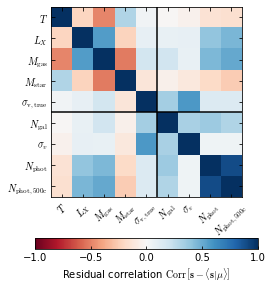

In [36]:
labels = [
    r'T',
    r'L_X',
#     r'Y_\mathrm{500c}',
    r'M_\mathrm{gas}',
    r'M_\mathrm{star}',
    r'\sigma_\mathrm{v,true}',
    r'N_\mathrm{gal}',
    r'\sigma_v',
    r'N_\mathrm{phot}',
    r'N_\mathrm{phot,500c}'
]
labels = [f'${x}$' for x in labels]

N = len(ideal+obs)

f,ax = plt.subplots(figsize=(4,5))
plt.imshow(Corr, vmin=-1,vmax=1, cmap='RdBu')
plt.colorbar(orientation='horizontal', pad=0.15,
             label=r'Residual correlation $\operatorname{Corr}\left[\mathbf{s} - \langle \mathbf{s}|\mu\rangle\right]$')
plt.plot(2*[len(ideal)-0.5], [-0.5,N-0.5], 'k')
plt.plot( [-0.5,N-0.5], 2*[len(ideal)-0.5],'k')

ax.set_xticks(range(N))
ax.set_yticks(range(N))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels)
print(zlist[z])
f.savefig('paper_xray/rescorr.pdf', bbox_inches='tight', dpi=500)

Text(0.5, 1.0, 'Inverse residual correlation matrix $\\left(s - \\langle s|\\mu\\rangle\\right)$')

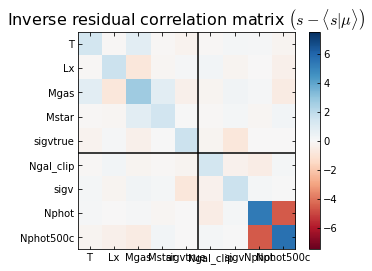

In [37]:
f,ax = plt.subplots(figsize=(5,4))
plt.imshow(np.linalg.inv(Corr), vmin=-7.5, vmax=7.5, cmap='RdBu')
plt.colorbar()

plt.plot(2*[len(ideal)-0.5], [-0.5,N-0.5], 'k')
plt.plot( [-0.5,N-0.5], 2*[len(ideal)-0.5],'k')

ax.set_xticks(range(len(ideal+obs)))
ax.set_yticks(range(len(ideal+obs)))
ax.set_xticklabels(ideal+obs)
ax.set_yticklabels(ideal+obs)

ax.set_title(r'Inverse residual correlation matrix $\left(s - \langle s|\mu\rangle\right)$', fontsize=16)

# f.savefig('temp/rescorrinv.png', dpi=500)

In [38]:
Cs = []
for i in range(len(zlist)):
    Cs += [np.cov(res[i])]

## Estimate scatters

In [39]:
singlesig = pd.Series(dtype='float64')

for i, field in enumerate((ideal+obs)):
    if field=='Ngal':
        print('')
    x = np.mean([np.sqrt(Cs[j][i,i]/scaling[j].loc[field,'alpha']**2) for j in range(len(zlist))])
    
    singlesig[field] = x
    
singlesig

T            0.117531
Lx           0.263326
Mgas         0.084602
Mstar        0.125554
sigvtrue     0.375623
Ngal_clip    0.397180
sigv         0.703852
Nphot        0.400230
Nphot500c    0.340664
dtype: float64

In [40]:
def calc_predsig(fields):
    mask = [(x in fields) for x in (ideal+obs)]
    out = []
    for i in range(len(zlist)):
        C = np.cov(np.array(res[i])[mask])
        Cinv = np.linalg.inv(C)

        als = np.array(scaling[i]['alpha'])[mask]
        out += [1/(als @ Cinv @ als)]
    return np.mean(out)

In [41]:
exp = [ideal[:-1], ['Mgas','Mstar','T'], ['Lx','sigvtrue']]
lj = 25

for fields in exp:
    sig = np.sqrt(calc_predsig(fields))
    print(','.join(fields).ljust(lj), ':', f'{sig:.3f}\t{sig/np.log(10):.3f}')

i=0
x = np.sqrt(C[i,i]/alpha[i]**2)
print(ideal[i].ljust(lj),':',f'{x:.3f}\t{x/np.log(10):.3f}')
i=1
x = np.sqrt(C[i,i]/alpha[i]**2)
print(ideal[i].ljust(lj),':',f'{x:.3f}\t{x/np.log(10):.3f}')
i=4
x = np.sqrt(C[i,i]/alpha[i]**2)
print(ideal[i].ljust(lj),':',f'{x:.3f}\t{x/np.log(10):.3f}')
i=5
x = np.sqrt(C[i,i]/alpha[i]**2)
print(ideal[i].ljust(lj),':',f'{x:.3f}\t{x/np.log(10):.3f}')
print('')
exp = [obs, ['Ngal_clip','sigv']]

for fields in exp:
    sig = np.sqrt(calc_predsig(fields))
    print(','.join(fields).ljust(lj), ':', f'{sig:.3f}\t{sig/np.log(10):.3f}')

i=-2
x = np.sqrt(C[i,i]/alpha[i]**2)
print(obs[i].ljust(lj),':',f'{x:.3f}\t{x/np.log(10):.3f}')
print('')
for key, value in models.items():
    print(key.ljust(lj), ':', f'{value*np.log(10):.3f}\t{value:.3f}')


T,Lx,Mgas,Mstar           : 0.039	0.017
Mgas,Mstar,T              : 0.041	0.018
Lx,sigvtrue               : 0.220	0.096


In [42]:
exp = ideal

def exhaustive_search(ind_list):
    out = []
    if ind_list[-1] == len(exp):
        return out
    for i in range(ind_list[-1]+1, len(exp)):
        out += exhaustive_search(ind_list+[i])
        
    if len(ind_list)!=1:
        fields = [exp[j] for j in ind_list]
        sig = np.sqrt(calc_predsig(fields))
        out += [(tuple(fields), sig)]
    return out

out = [((i[0],),i[1]) for i in singlesig[ideal].items()]
for i in range(len(exp)):
    out += exhaustive_search([i])
        
ideal_scatters = pd.DataFrame(out, columns=['field','sigperc']).set_index('field').sort_values('sigperc')

In [43]:
ideal_scatters['sigdex'] = ideal_scatters['sigperc']/np.log(10)
ideal_scatters['Nfields'] = [len(x) for x in ideal_scatters.index]

# ideal_scatters['sigperc']/=100
ideal_scatters.head(15)

,sigperc,sigdex,Nfields
field,,,
"(T, Lx, Mgas, Mstar, sigvtrue)",0.038970,0.016924,5
"(T, Lx, Mgas, Mstar)",0.039040,0.016955,4
"(T, Mgas, Mstar, sigvtrue)",0.040560,0.017615,4
"(T, Mgas, Mstar)",0.040628,0.017645,3
"(Lx, Mgas, Mstar, sigvtrue)",0.046821,0.020334,4
"(Lx, Mgas, Mstar)",0.046894,0.020366,3
"(Mgas, Mstar, sigvtrue)",0.049242,0.021386,3
"(Mgas, Mstar)",0.049347,0.021431,2
"(T, Lx, Mgas, sigvtrue)",0.049883,0.021664,4


In [44]:
ideal_scatters[ideal_scatters['Nfields']==2]

,sigperc,sigdex,Nfields
field,,,
"(Mgas, Mstar)",0.049347,0.021431,2
"(T, Mgas)",0.050755,0.022043,2
"(Lx, Mgas)",0.082938,0.036019,2
"(Mgas, sigvtrue)",0.084420,0.036663,2
"(T, Lx)",0.097769,0.042461,2
"(T, Mstar)",0.098952,0.042974,2
"(Lx, Mstar)",0.108377,0.047068,2
"(T, sigvtrue)",0.112672,0.048933,2
"(Mstar, sigvtrue)",0.115723,0.050258,2


In [45]:
exp = obs

out = [((i[0],),i[1]) for i in singlesig[obs].items()]
for i in range(len(exp)):
    out += exhaustive_search([i])
        
obs_scatters = pd.DataFrame(out, columns=['field','sigperc']).set_index('field').sort_values('sigperc')

In [46]:
obs_scatters['sigdex'] = obs_scatters['sigperc']/np.log(10)
obs_scatters['Nfields'] = [len(x) for x in obs_scatters.index]

obs_scatters

,sigperc,sigdex,Nfields
field,,,
"(Ngal_clip, sigv, Nphot, Nphot500c)",0.273357,0.118718,4
"(Ngal_clip, sigv, Nphot500c)",0.275877,0.119812,3
"(Ngal_clip, Nphot, Nphot500c)",0.285377,0.123938,3
"(Ngal_clip, Nphot500c)",0.288180,0.125155,2
"(sigv, Nphot, Nphot500c)",0.303782,0.131931,3
"(sigv, Nphot500c)",0.304804,0.132375,2
"(Ngal_clip, sigv, Nphot)",0.306050,0.132916,3
"(Ngal_clip, Nphot)",0.320398,0.139147,2
"(Nphot500c,)",0.340664,0.147948,1


In [47]:
ideal_scatters.to_csv('paper_xray/MGTM_ideal.csv')
obs_scatters.to_csv('paper_xray/MGTM_obs.csv')

# Results

In [48]:
field = 'Nphot500c'

x = np.log(catalog.prop[field])
ypred = np.zeros(len(x))
for i in range(len(zlist)):
    mask = zs == zlist[i]
    ypred[mask] = (x[mask]-scaling[i].loc[field,'pi'])/scaling[i].loc[field,'alpha']

runs[field]['pred'] = (ypred+np.log(Mp))/np.log(10)


In [49]:
names = {
    'Nphot500c':r'Scalar Proxy $N_\mathrm{phot,500c}$',
    'xray':'Single-band X-ray CNN', 
    'xrayMB':'Multi-band X-ray CNN',
    'multi':'X-ray+Spec-z CNN',
}

In [50]:
model_scatters = []

for key in ['xray', 'xrayMB','multi']:
    x = Ydr
    y = runs[key]['pred']
    sig = np.std(y-x)
    print(key, np.mean(y-x)/(sig/np.sqrt(len(x)-1)))
    
    model_scatters.append([key, sig])
    
model_scatters = pd.DataFrame(model_scatters, columns=['field','sigdex']).set_index('field')
model_scatters['sigperc'] = model_scatters['sigdex']*np.log(10)


xray -0.27519269806438534
xrayMB -0.7112518870926756
multi -0.7639529589524559


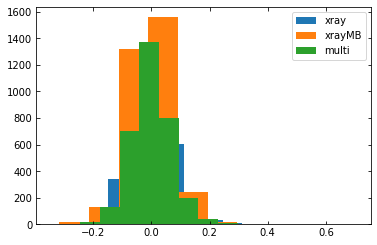

In [51]:
plt.figure()
for key in ['xray', 'xrayMB','multi']:
    x = Ydr
    y = runs[key]['pred']
    
    plt.hist(y-x, label=key)
    
plt.legend()

Nphot500c -2.6147478947659585e-15
xray -0.0008546993977812896
xrayMB -0.002008016530506376
multi -0.0021198216157936596


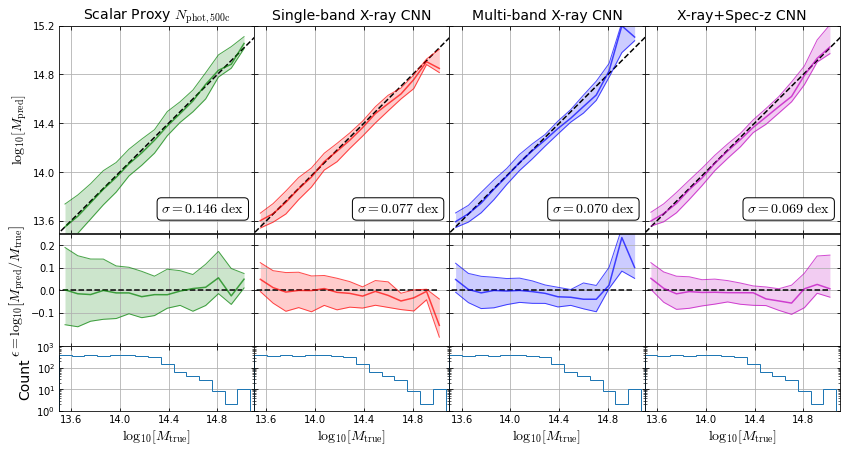

In [52]:
f = plt.figure(figsize=(14,7.1))

gs = mpl.gridspec.GridSpec(3,4, hspace=0, wspace=0, height_ratios=[3.25,1.75,1])

cs = ['g','r','b','m']

for i, key in enumerate(['Nphot500c', 'xray', 'xrayMB','multi']):# enumerate(runs.keys()):
    ax = f.add_subplot(gs[0,i])
    
    # ~~~ PLOT TRUE VS PRED ~~~
    x = Ydr
    y = runs[key]['pred']
    
    print(key, np.mean(y-x)*np.log(10))
    
    ax.plot(range(13,17), range(13,17), 'k--')
#     ax.plot(x, y, 'k.', alpha=0.03)

    binned_plot(x,y, percentiles=[0], label='MDPL2',
                n=15, color=cs[i], ax=ax)
    binned_plot(x,y, percentiles=[34], 
                n=15, color=cs[i], ax=ax)
    
    ax.grid()
    ax.set_xticks(np.arange(13.6,15.2,0.4))
    ax.set_yticks(np.arange(13.6,15.4,0.4))
    ax.set_xlim(13.5,15.1)
    ax.set_ylim(13.5,15.2)
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{names[key]}', fontsize=14)
    
    if i==0:
        ax.set_ylabel(r'$\log_{10} [M_\mathrm{pred}]$', fontsize=14)
    else:
        ax.tick_params(labelleft=False)
    ax.tick_params(labelbottom=False)
    
    # ~~~ TEXT: SCATTER METRIC ~~~
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    ax.text(0.95, 0.15, f'$\sigma = {np.std(y-x):.3f}\ \mathrm{{dex}}$', 
            bbox=props,
            transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='right')
    
    
    # ~~~ PLOT TRUE VS EPS ~~~
    ax = f.add_subplot(gs[1,i])
    ax.plot(range(13,16), [0]*3, 'k--')
    
#     ax.plot(x, y-x, 'm.', alpha=0.02)
    
    binned_plot(x, y-x, percentiles=[0], alpha=1,
                n=15, color=cs[i], ax=ax)
    binned_plot(x, y-x, percentiles=[34], 
                n=15, color=cs[i], ax=ax)
    
    ax.grid()
    ax.set_xticks(np.arange(13.6,15.2,0.4))
    ax.set_yticks(np.arange(-0.1,0.2,0.1))
    ax.set_xlim(13.5,15.1)
    ax.set_ylim(-0.25,0.25)
#     ax.set_aspect('equal', 'box')
    
    if i==0:
        ax.set_ylabel(r'$\epsilon = \log_{10}\left[M_\mathrm{pred}/M_\mathrm{true}\right]$', fontsize=14)
    else:
        ax.tick_params(labelleft=False)
        
        
        
    # ~~~ PLOT MASS DISTRIBUTION ~~~
    ax = f.add_subplot(gs[2,i])
    ax.semilogy()
    ax.hist(x, bins=15, histtype='step')
    ax.grid()
    ax.set_xticks(np.arange(13.6,15.2,0.4))
    ax.set_xlim(13.5,15.1)
    ax.set_ylim(1,1e3)
    if i==0:
        ax.set_ylabel(r'Count', fontsize=14)
    else:
        ax.tick_params(labelleft=False)
        
    ax.set_xlabel(r'$\log_{10} [M_\mathrm{true}]$', fontsize=14)
    
f.savefig('paper_xray/multi_compare.pdf', bbox_inches='tight', dpi=400)

In [83]:
# \newcommand{\yfhc}{Y_\mathrm{500c}}
# \newcommand{\lx}{L_X}
# \newcommand{\mgas}{M_\mathrm{gas}}
# \newcommand{\mstar}{M_\mathrm{star}}
# \newcommand{\sigvtrue}{\sigma_\mathrm{v,true}}
# \newcommand{\sigv}{\sigma_\mathrm{v}}
# \newcommand{\ngal}{N_\mathrm{gal}}
# \newcommand{\nphot}{N_\mathrm{phot}}
# \newcommand{\nphotfhc}{N_\mathrm{phot,500c}}

tablenames = {
    'T':'T',
    'Y500c':'\yfhc',
    'Lx':'L_X',
    'Mgas':'\mgas',
    'Mstar':'\mstar',
    'sigvtrue':'\sigvtrue',
    'sigv':'\sigv',
    'Ngal_clip':r'\ngal',
    'Nphot':r'\nphot',
    'Nphot500c':r'\nphotfhc'
}

def print_row(row):
    name = ''
    for field in row.name:
        name += tablenames[field]+', '
        
    name = '${'+name[:-2]+'}$'
    s = f"{name} & {row['sigdex']:.4f} & {row['sigperc']*100:.2f} \\\\"
    print(s)
    
def get_min_by_Nfields(scatters):
    out = []
    for i in range(1, max(scatters['Nfields'])+1):
        mask = scatters['Nfields']==i
        out.append(scatters[mask].sort_values('sigperc').reset_index().iloc[0])
    return pd.DataFrame(out).set_index('field')
    
for field in ideal:
    x = ideal_scatters.loc[[(field,)]].iloc[0]
    print_row(x)
print('\\midrule')
for field in obs:
    x = obs_scatters.loc[[(field,)]].iloc[0]
    print_row(x)
    
print('\\midrule')
temp_scatters = get_min_by_Nfields(ideal_scatters) # ideal_scatters.reset_index().groupby('Nfields').min().set_index('field') # sorry lol
for i in range(1,len(temp_scatters)):
    x = temp_scatters.iloc[i]
    print_row(x)
    
print('\\midrule')
temp_scatters = get_min_by_Nfields(obs_scatters) # obs_scatters.reset_index().groupby('Nfields').min().set_index('field') # sorry lol
for i in range(1,len(temp_scatters)):
    x = temp_scatters.iloc[i]
    print_row(x)

print('\\midrule')
def print_model_row(row):
    name = names[field]
#     name = f"\mathrm{{{name}}}"
    
    s = f"{name} & {row['sigdex']:.4f} & {row['sigperc']*100:.2f} \\\\"
    print(s)

for field in ['xray','xrayMB','multi']:
    print_model_row(model_scatters.loc[field])

${T}$ & 0.0510 & 11.75 \\
${L_X}$ & 0.1144 & 26.33 \\
${\mgas}$ & 0.0367 & 8.46 \\
${\mstar}$ & 0.0545 & 12.56 \\
${\sigvtrue}$ & 0.1631 & 37.56 \\
\midrule
${\ngal}$ & 0.1725 & 39.72 \\
${\sigv}$ & 0.3057 & 70.39 \\
${\nphot}$ & 0.1738 & 40.02 \\
${\nphotfhc}$ & 0.1479 & 34.07 \\
\midrule
${\mgas, \mstar}$ & 0.0214 & 4.93 \\
${T, \mgas, \mstar}$ & 0.0176 & 4.06 \\
${T, L_X, \mgas, \mstar}$ & 0.0170 & 3.90 \\
${T, L_X, \mgas, \mstar, \sigvtrue}$ & 0.0169 & 3.90 \\
\midrule
${\ngal, \nphotfhc}$ & 0.1252 & 28.82 \\
${\ngal, \sigv, \nphotfhc}$ & 0.1198 & 27.59 \\
${\ngal, \sigv, \nphot, \nphotfhc}$ & 0.1187 & 27.34 \\
\midrule
Single-band X-ray CNN & 0.0773 & 17.80 \\
Multi-band X-ray CNN & 0.0703 & 16.18 \\
X-ray+Spec-z CNN & 0.0691 & 15.90 \\


In [84]:
temp_scatters = ideal_scatters.reset_index().groupby('Nfields').min().set_index('field')
temp_scatters

,sigperc,sigdex
field,,
"(Lx,)",0.084602,0.036742
"(Lx, Mgas)",0.049347,0.021431
"(Lx, Mgas, Mstar)",0.040628,0.017645
"(Lx, Mgas, Mstar, sigvtrue)",0.039040,0.016955
"(T, Lx, Mgas, Mstar, sigvtrue)",0.038970,0.016924


# Interpretability

## Plot examples

In [68]:
# Load local single-band
models = runs['xray']['models']
# pred = runs['xray']['pred']

In [54]:
# Get all saliency maps

batch_size = 100

def get_grad_eval(model, im):
    image = tf.Variable(im, dtype=float)
    
    with tf.GradientTape() as tape:
        pred = model(image, training=False)
        pred = data_manager.deregularize(pred)
        loss = pred[0]
    
    grads = tape.gradient(loss, image)

    dgrad_abs = tf.math.abs(grads)[0]
    
    return dgrad_abs

grad2 = np.zeros(shape=X2.shape)
for i in tqdm.tqdm(range(len(X2))):
    grad2[i] = get_grad_eval(models[fold[i]], X2[i:i+1])

  0%|          | 0/3285 [00:00<?, ?it/s]2023-05-30 19:07:07.922118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-05-30 19:07:08.921419: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-05-30 19:07:10.484038: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-30 19:07:11.543412: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-05-30 19:07:11.613822: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100%|██████████| 3285/3285 [00:24<00:00, 134.01it/s]


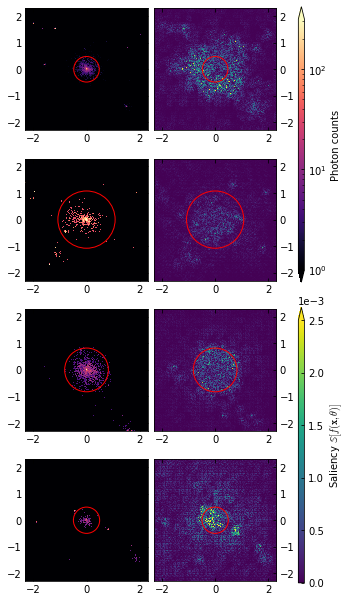

In [75]:
N = 4

inds = [3234, 90, 1370, 1203] # np.random.choice(len(catalog), N, replace=False) #  [149, 1611, 1308, 2118] #

f = plt.figure(figsize=(5,N*2.65))
gs = mpl.gridspec.GridSpec(N,4, wspace=0.1, width_ratios=[1,1,0.075,0.05])

for i, ind in enumerate(inds):
    
    ax = f.add_subplot(gs[i,0])
    img = catalog.ximgs[ind]
    im1 = ax.imshow(np.rot90(img+1e-4, k=-1), 
                   norm=mcolors.LogNorm(vmin=10**0, vmax=10**2.5),
                   interpolation='none',cmap='magma',
                   extent=[-aperture,aperture,-aperture,aperture])
        
    circle = plt.Circle((0,0), float(catalog.prop['r500c'][ind])/1e3, color='r', fill=False)
    ax.add_patch(circle)
    
    
    ax = f.add_subplot(gs[i,1])
    img = grad2[ind]
    im2 = ax.imshow(img,
                   vmin=0,vmax=0.0025,
                   interpolation='none',cmap='viridis',
                   extent=[-aperture,aperture,-aperture,aperture])
        
    circle = plt.Circle((0,0), float(catalog.prop['r500c'][ind])/1e3, color='r', fill=False)
    ax.add_patch(circle)
    ax.yaxis.tick_right()
    
    
cax = f.add_subplot(gs[:N//2,-1])
cb = plt.colorbar(im1, cax=cax, aspect=0.1, extend='both', label=r'Photon counts')

cax = f.add_subplot(gs[N//2:,-1])
cb = plt.colorbar(im2, cax=cax, extend='max', 
                  label=r'Saliency $\mathbb{S}\left[f(\mathbf{x},\theta)\right]$')
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('left')
cb.update_ticks()

f.savefig('paper_xray/ex_saliency.pdf', bbox_inches='tight')

## Test cluster cores

In [76]:
X, Y = np.meshgrid(*(2*[np.linspace(-aperture,aperture,X2.shape[1])]))

d = np.sqrt(X**2 + Y**2)

dnorm = np.outer(1/(catalog.prop['r500c'].values/1e3), d.reshape(-1)) # in units of r500c
dnorm = dnorm.reshape(-1)

grad2flat = grad2.reshape(len(grad2),-1).reshape(-1)

ximgsflat = catalog.ximgs.reshape(len(catalog.ximgs), -1)
Nphot = np.sum(ximgsflat, axis=-1)[:,None]

ximgsnew = np.zeros_like(ximgsflat)
for i, z in enumerate(zlist):
    mask = zs==z
    ximgsnew[mask,:] = (ximgsflat[mask]+1)/(Nphot[mask]*scaling[i].loc['Nphot','alpha'])
    
ximgsnew = ximgsnew.reshape(-1)

mask = np.random.rand(len(grad2flat))<1e-1
mask *= dnorm <= 3

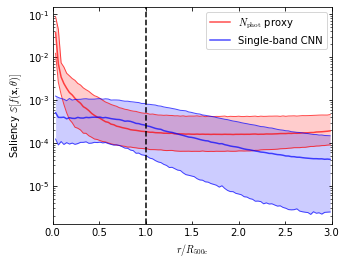

In [77]:
f,ax = plt.subplots(figsize=(5,4))
ax.semilogy()
_ = binned_plot(dnorm[mask], ximgsnew[mask], 
                percentiles=[0], label=r'$N_\mathrm{phot}$ proxy',
                n=100, color='r', ax=ax)
_ = binned_plot(dnorm[mask], ximgsnew[mask], 
                percentiles=[34], 
                n=100, color='r', ax=ax)

_ = binned_plot(dnorm[mask], grad2flat[mask], 
                percentiles=[0], label='Single-band CNN',
                n=100, color='b', ax=ax)
_ = binned_plot(dnorm[mask], grad2flat[mask], 
                percentiles=[34], 
                n=100, color='b', ax=ax)
ax.axvline(1, color='k', linestyle='--')
ax.set_xlim(0,3)
ax.legend()

ax.set_xlabel(r'$r/R_\mathrm{500c}$')
ax.set_ylabel(r'Saliency $\mathbb{S}\left[f(\mathbf{x},\theta)\right]$')

f.savefig('paper_xray/core.pdf', bbox_inches='tight')

/tmp/ipykernel_1080750/1745688468.py:4: RuntimeWarning: divide by zero encountered in true_divide
  h, bins = binned_plot(dnorm[mask], ximgsnew[mask]/grad2flat[mask],


(0.0, 3.0)

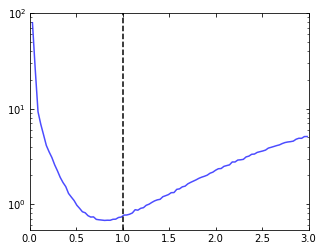

In [58]:
f,ax = plt.subplots(figsize=(5,4))
ax.semilogy()

h, bins = binned_plot(dnorm[mask], ximgsnew[mask]/grad2flat[mask], 
                percentiles=[0],
                n=100, color='b', ax=ax)
ax.axvline(1, color='k', linestyle='--')
ax.set_xlim(0,3)

In [59]:
np.interp(x=10,xp=h[:10].astype(float),fp=bins[:10].astype(float), )

0.2851301203531153

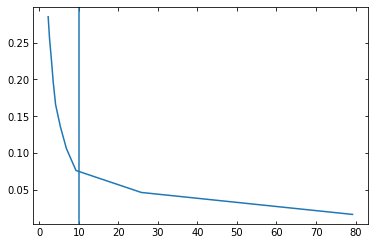

In [60]:
plt.plot(h[:10].astype(float), bins[:10].astype(float))
plt.axvline(10)

In [61]:
bins[:10]

array([0.0165969 , 0.04643392, 0.07627095, 0.10610797, 0.135945  ,
       0.16578202, 0.19561905, 0.22545607, 0.2552931 , 0.28513012])

## AGN attention

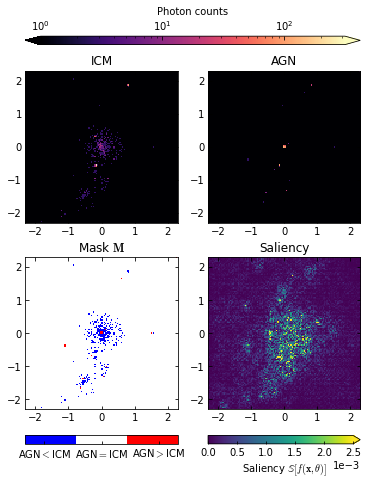

In [85]:
ind = 1632 # np.random.choice(len(X2)) # 3050 # 

f = plt.figure(figsize=(6,7.5))
gs = mpl.gridspec.GridSpec(4,2, height_ratios=[1,20,20,1])

ax = f.add_subplot(gs[1,0])
img = catalog.xiimgs[ind]
im1 = ax.imshow(np.rot90(img+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2.5),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_title('ICM')

ax = f.add_subplot(gs[1,1])
img = catalog.xaimgs[ind]
im1 = ax.imshow(np.rot90(img+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2.5),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_title('AGN')

from matplotlib import colors
cmap = colors.ListedColormap(['blue', 'white', 'red'])
bounds=[-1.5,-0.5,0.5,1.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

ax = f.add_subplot(gs[2,0])
img = (catalog.xaimgs[ind] > catalog.xiimgs[ind]).astype(int)
img[catalog.xaimgs[ind] < catalog.xiimgs[ind]] = -1
im2 = ax.imshow(np.rot90(img, k=-1), 
#                norm=mcolors.LogNorm(vmin=10**0, vmax=10**2.5),
               interpolation='none',cmap=cmap,
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_title(r'Mask $\mathbf{M}$')


ax = f.add_subplot(gs[2,1])
img = grad2[ind]
im3 = ax.imshow(img, 
                vmin=0,vmax=0.0025,
               interpolation='none',cmap='viridis',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_title(r'Saliency')



cax = f.add_subplot(gs[0,:])
cb = plt.colorbar(im1, cax=cax, orientation='horizontal', extend='both', label=r'Photon counts')
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


cax = f.add_subplot(gs[-1,0])
cb = plt.colorbar(im2, cax=cax, orientation='horizontal')
cb.set_ticks([-0.75,0,0.75])
cb.set_ticklabels(['AGN$<$ICM', 'AGN$=$ICM', 'AGN$>$ICM'])

cax = f.add_subplot(gs[-1,1])
cb = plt.colorbar(im3, cax=cax, orientation='horizontal', extend='max', label=r'Saliency $\mathbb{S}\left[f(\mathbf{x},\theta)\right]$')
cb.formatter.set_powerlimits((0, 0))
# cb.ax.yaxis.set_offset_position('left')
# cb.update_ticks()

f.savefig('paper_xray/attagn.pdf',bbox_inches='tight')

In [63]:
# Sagn = np.zeros(len(catalog))
# Sicm = np.zeros(len(catalog))

# Nagn = np.zeros(len(catalog))
# Nicm = np.zeros(len(catalog))

# for i in tqdm.tqdm(range(len(catalog))):
#     icm = catalog.xiimgs[i]
#     agn = catalog.xaimgs[i]
    
#     Sagn[i] = np.mean(grad2[i][agn>icm])
#     Sicm[i] = np.mean(grad2[i][icm>agn])
    
    
    
#     Nagn[i] = np.mean((icm+agn)[agn>icm])
#     Nicm[i] = np.mean((icm+agn)[icm>agn])
    
Sagn = [] # np.zeros(len(catalog))
Sicm = [] # np.zeros(len(catalog))

Nagn = np.zeros(len(catalog))
Nicm = np.zeros(len(catalog))

for i in tqdm.tqdm(range(len(catalog))):
    icm = catalog.xiimgs[i]
    agn = catalog.xaimgs[i]
    
#     icm = np.repeat(icm, repeats=3, axis=-1)
#     agn = np.repeat(agn, repeats=3, axis=-1)
    
    Sagn = np.append(Sagn, grad2[i][agn>icm])
    Sicm = np.append(Sicm, grad2[i][icm>agn])
    
    
    
    Nagn[i] = np.mean((icm+agn)[agn>icm])
    Nicm[i] = np.mean((icm+agn)[icm>agn])

  0%|          | 0/3285 [00:00<?, ?it/s]/hildafs/home/mho1/.conda/envs/jupy-gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hildafs/home/mho1/.conda/envs/jupy-gpu/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3285/3285 [00:01<00:00, 2006.92it/s]


In [64]:
print('Sagn:', np.mean(Sagn[~np.isnan(Sagn)]))
print('Sicm:', np.mean(Sicm[~np.isnan(Sicm)]))

Sagn: 0.00033614156233453596
Sicm: 0.0004733045277813907


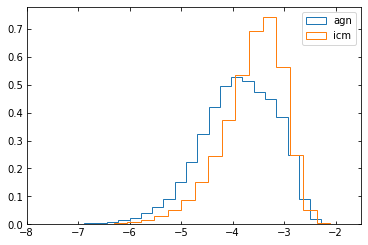

In [65]:
# plt.semilogx()

Sagn = Sagn[Sagn>0]
Sicm = Sicm[Sicm>0]
plt.hist(np.log10(Sagn), density=True, bins=30, histtype='step', label='agn')
plt.hist(np.log10(Sicm), density=True, bins=30, histtype='step', label='icm')

plt.xlim(-8,-1.5)

plt.legend()

In [66]:
for tmp in [Sagn, Sicm]:
    tmp = np.log10(np.percentile(tmp, [50,16,84]))
    tmp[[1,2]] -= tmp[0]
    
    print(f'$10^{{{tmp[0]:.2f}_{{{tmp[1]:.2f}}}^{{+{tmp[2]:.2f}}}}}$')
#     print(np.mean(np.log10(tmp[tmp>0])), np.std(np.log10(tmp[tmp>0])))

$10^{-3.85_{-0.74}^{+0.71}}$
$10^{-3.53_{-0.67}^{+0.47}}$


In [67]:
print('Nagn:', np.mean(Nagn[~np.isnan(Sagn)]))
print('Nicm:', np.mean(Nicm[~np.isnan(Sicm)]))
print('Nagn/Nicm:', np.mean(Nagn[~np.isnan(Sagn)])/np.mean(Nicm[~np.isnan(Sicm)]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3285 but corresponding boolean dimension is 36552

## Multiband attention

In [86]:
# Load local multi-band
models = runs['xrayMB']['models']
pred = runs['xrayMB']['pred']

In [87]:
# Get all saliency maps

batch_size = 100

def get_grad_eval(model, im):
    image = tf.Variable(im, dtype=float)
    
    with tf.GradientTape() as tape:
        pred = model(image, training=False)
        pred = data_manager.deregularize(pred)
        loss = pred[0]
    
    grads = tape.gradient(loss, image)

    dgrad_abs = tf.math.abs(grads)[0]
    
    return dgrad_abs

grad3 = np.zeros(shape=X3.shape)
for i in tqdm.tqdm(range(len(X3))):
    grad3[i] = get_grad_eval(models[fold[i]], X3[i:i+1])

100%|██████████| 3285/3285 [00:22<00:00, 148.68it/s]


14.336765833580568


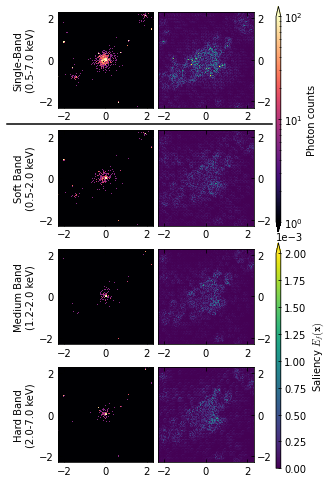

In [105]:
ind = 1151 # np.random.choice(len(X3)) # 1801
img = catalog.xmbimgs[ind]
gradimg = grad3[ind]
imgSB = catalog.ximgs[ind]
gradSB = grad2[ind]
print(Ydr[ind])

f = plt.figure(figsize=(4,8.5))
gs = mpl.gridspec.GridSpec(4,4, width_ratios=[20,20,2.5,1], hspace=0.1, wspace=0.1)

ax = f.add_subplot(gs[0,0])
im1 = ax.imshow(np.rot90(imgSB[...,0]+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_ylabel('Single-Band\n(0.5-7.0 keV)')
ax = f.add_subplot(gs[0,1])
im3 = ax.imshow(gradSB[...,0], 
                vmin=0,vmax=0.002,
               interpolation='none',cmap='viridis',
               extent=[-aperture,aperture,-aperture,aperture])
ax.yaxis.tick_right()

ax = f.add_subplot(gs[1,0])
im1 = ax.imshow(np.rot90(img[...,0]+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_ylabel('Soft Band\n(0.5-2.0 keV)')
ax = f.add_subplot(gs[1,1])
im3 = ax.imshow(gradimg[...,0], 
                vmin=0,vmax=0.002,
               interpolation='none',cmap='viridis',
               extent=[-aperture,aperture,-aperture,aperture])
ax.yaxis.tick_right()

ax = f.add_subplot(gs[2,0])
im1 = ax.imshow(np.rot90(img[...,1]+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_ylabel('Medium Band\n(1.2-2.0 keV)')
ax = f.add_subplot(gs[2,1])
im3 = ax.imshow(gradimg[...,1], 
                vmin=0,vmax=0.002,
               interpolation='none',cmap='viridis',
               extent=[-aperture,aperture,-aperture,aperture])
ax.yaxis.tick_right()

ax = f.add_subplot(gs[3,0])
im1 = ax.imshow(np.rot90(img[...,2]+1e-4, k=-1), 
               norm=mcolors.LogNorm(vmin=10**0, vmax=10**2),
               interpolation='none',cmap='magma',
               extent=[-aperture,aperture,-aperture,aperture])
ax.set_ylabel('Hard Band\n(2.0-7.0 keV)')
ax = f.add_subplot(gs[3,1])
im3 = ax.imshow(gradimg[...,2], 
                vmin=0,vmax=0.002,
               interpolation='none',cmap='viridis',
               extent=[-aperture,aperture,-aperture,aperture])
ax.yaxis.tick_right()

cax = f.add_subplot(gs[0:2,-1])
cb = plt.colorbar(im1, cax=cax, extend='both', label=r'Photon counts')

cax = f.add_subplot(gs[2:,-1])
cb = plt.colorbar(im3, cax=cax, extend='max', label=r'Saliency $E_f(\mathbf{x})$')
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('left')
cb.update_ticks()

y=0.687
line = plt.Line2D([-0.05,0.87],[y,y], transform=f.transFigure, color="black")
f.add_artist(line)


f.savefig('paper_xray/attMB.pdf',bbox_inches='tight')

In [101]:
for i in range(3):
    tmp = grad3[...,i].flatten()
    tmp = tmp[tmp>0]
    tmp = np.log10(np.percentile(tmp, [50,16,84]))
    tmp[[1,2]] -= tmp[0]
    
    print(f'$10^{{{tmp[0]:.2f}_{{{tmp[1]:.2f}}}^{{+{tmp[2]:.2f}}}}}$')
#     print(np.mean(np.log10(tmp[tmp>0])), np.std(np.log10(tmp[tmp>0])))

$10^{-4.15_{-0.68}^{+0.56}}$
$10^{-4.17_{-0.68}^{+0.59}}$
$10^{-4.15_{-0.72}^{+0.60}}$


Text(0, 0.5, 'Counts')

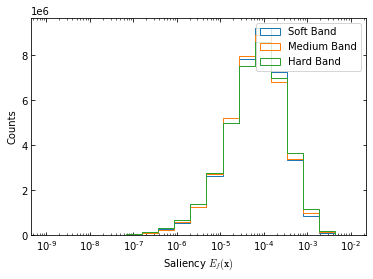

In [102]:
f,ax = plt.subplots()

labs =  ['Soft Band', 'Medium Band', 'Hard Band']
ax.semilogx()
bins = 10**np.linspace(-9,-2,20)
for i in range(3):
    ax.hist(grad3[...,i].flatten()+1e-16, bins=bins, histtype='step', label=labs[i])
    
ax.legend()
ax.set_xlabel(r'Saliency $E_f(\mathbf{x})$')
ax.set_ylabel('Counts')
# f.savefig('paper_xray/saliency_hist.pdf', bbox_inches='tight')

In [103]:
np.median(grad3[...,2])

3.0853820135234855e-05

In [104]:
Sagn = [] # np.zeros(len(catalog))
Sicm = [] # np.zeros(len(catalog))

Nagn = np.zeros(len(catalog))
Nicm = np.zeros(len(catalog))

for i in tqdm.tqdm(range(len(catalog))):
    icm = catalog.xiimgs[i]
    agn = catalog.xaimgs[i]
    
    icm = np.repeat(icm, repeats=3, axis=-1)
    agn = np.repeat(agn, repeats=3, axis=-1)
    
    Sagn = np.append(Sagn, grad3[i][agn>icm])
    Sicm = np.append(Sicm, grad3[i][icm>agn])
    
    
    
    Nagn[i] = np.mean((icm+agn)[agn>icm])
    Nicm[i] = np.mean((icm+agn)[icm>agn])

  0%|          | 0/3285 [00:00<?, ?it/s]/hildafs/home/mho1/.conda/envs/jupy-gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hildafs/home/mho1/.conda/envs/jupy-gpu/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 3285/3285 [00:07<00:00, 462.95it/s] 


In [105]:
print('Sagn:', np.mean(Sagn[~np.isnan(Sagn)]))
print('Sicm:', np.mean(Sicm[~np.isnan(Sicm)]))

Sagn: 0.0002226080602816082
Sicm: 0.0002857792597498068


In [106]:
Sagn = Sagn[Sagn>0]
Sicm = Sicm[Sicm>0]
for tmp in [Sagn, Sicm]:
    tmp = np.log10(np.percentile(tmp, [50,16,84]))
    tmp[[1,2]] -= tmp[0]
    
    print(f'$10^{{{tmp[0]:.2f}_{{{tmp[1]:.2f}}}^{{+{tmp[2]:.2f}}}}}$')
#     print(np.mean(np.log10(tmp[tmp>0])), np.std(np.log10(tmp[tmp>0])))

$10^{-3.91_{-0.74}^{+0.61}}$
$10^{-3.77_{-0.63}^{+0.49}}$


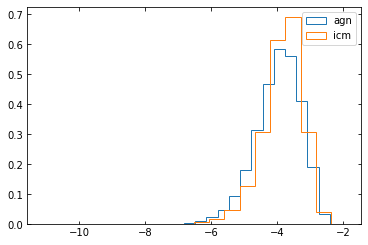

In [107]:
# plt.semilogx()

Sagn = Sagn[Sagn>0]
Sicm = Sicm[Sicm>0]
plt.hist(np.log10(Sagn), density=True, bins=20, histtype='step', label='agn')
plt.hist(np.log10(Sicm), density=True, bins=20, histtype='step', label='icm')

plt.legend()

# Random richness

In [ ]:
catalog_name = 'Magneticum_dynXray_z=0.1-0.29_LOS-z_131222_contam.p'
model_id = f'Magm9.5-large-vsUM-z=0.0231-1f-MULTI-SAMPLED'
reweight=False

# Naming
model_type = 'cnn2dg'
model_name = f'cnn2dg_{model_id}'
model_dir = os.path.join(wdir, 'saved_models', model_type, model_name)

# Global parameters
nfolds = 10
epochs = 100

In [ ]:
decay = 1e-4
lr = 1e-3
p=1e-1

def make_model():
    in1 = Input(shape=(64,64,64,1))# X1.shape[1:])
    in2 = Input(shape=(*(128,128),1)) # (*(X2.shape[1:-1]),1))

    x1 = Conv1D(filters=24, kernel_size=5, padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in1)
    x1 = Conv1D(filters=10, kernel_size=3, padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = Flatten()(x1)
    x1 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x1)

    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), strides=(2,2), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)

    x = Concatenate()([x1,x2])

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=[in1,in2], outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_squared_error', optimizer=opt,
                  metrics=['mean_squared_error'])
    return model


def make_model():
    in1 = Input(shape=(64,64,64,1))# X1.shape[1:])
    in2 = Input(shape=(*(128,128),1)) # (*(X2.shape[1:-1]),1))


    in2big = tf.keras.layers.AveragePooling2D((2,2))(in2)
    in2big = tf.expand_dims(in2big, axis=3)
    in2big = tf.repeat(in2big, 64, axis=3)


    infull = tf.concat([in1, in2big], axis=-1)
    
    x1 = Conv3D(filters=24, kernel_size=5, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(infull)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    x1 = Conv3D(filters=16, kernel_size=3, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    x1 = Conv3D(filters=8, kernel_size=1, padding='valid',
                activation='relu', kernel_regularizer=l2(decay))(x1)
    x1 = MaxPool3D(pool_size=(2,2,2))(x1)
    
    x1 = Flatten()(x1)
    x1 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x1)
    x1 = Dropout(p)(x1)
    
    
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(in2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), strides=(2,2), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(4, 4), strides=None, padding="valid")(x2)
    x2 = Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), padding='same',
                       activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = Conv2D(filters=10, kernel_size=(3,3), padding='same',
               activation='relu', kernel_regularizer=l2(decay))(x2)
    x2 = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(units=128, activation='relu',
               kernel_regularizer=l2(decay))(x2)
    x2 = Dropout(p)(x2)

    x = Concatenate()([x1,x2])
#     x = x1

    x = Dense(units=128, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=64, activation='relu',
              kernel_regularizer=l2(decay))(x)
    x = Dropout(p)(x)
    x = Dense(units=1, activation='linear',
              kernel_regularizer=l2(decay))(x)

    model = Model(inputs=[in1,in2], outputs=x)

    opt = Adam(lr=lr)

    model.compile(loss='mean_squared_error', optimizer=opt,
                  metrics=['mean_squared_error'])
    return model


In [ ]:
samps = np.linspace(0,1,41)

for frac in samps:
    print(frac)

    # Initialize data manager
    data_manager = hc.data.GaussManager(
        input_shape=(64,64,64),
        bandwidth=0.15,
        nfolds=nfolds,
        mass_range_train=(None, None), # full range of masses
        mass_range_test=(None, None),
        dn_dlogm=(10.**-6.3 if model_id[:2]=='Uc' else 10.**-6), # 10.**-6.3, 
        dlogm=0.01, val_split=0.,
        volume=(8e9 if model_id[:2]=='Uc' else 1e9,),
        vcut = vcut,
        aperture = aperture
    )

    fname = join(wdir, 'data_cache',
                 f'proc_{catalog_name}_sampfrac={frac}.npy')
    @cache_data(fname, cache=True)
    def gen():
        fname = join(wdir,'data_mocks',catalog_name)
        with open(fname, 'rb') as in_file:
            catalog = pickle.load(in_file)
            
        for i in range(len(catalog)):
            L = len(catalog.gal[i])
            mask = np.zeros(L, dtype=bool)
            mask[np.random.choice(a=L, size=int(frac*L), replace=False)] = True
            
            catalog.gal[i] = catalog.gal[i][mask]
            catalog.prop['Ngal'].iloc[i] = len(catalog.gal[i])
        
        mask = catalog.prop['Ngal']>3
        catalog = catalog[mask.values]
        if len(catalog)==0:
            return None
        
        pdfs = data_manager.generate_pdfs(catalog, ['xproj', 'yproj', 'vlos'], 
                                          n_proc=10, )    
        return pdfs

    pdfs = gen()

In [ ]:
samps = np.linspace(0,1,11)

pdfs = []
ids = []
masses = []
xrays = []

fname = join(wdir,'data_mocks',catalog_name)
with open(fname, 'rb') as in_file:
    catalog = pickle.load(in_file)

for frac in samps:
    
    fname = join(wdir, 'data_cache',
                 f'proc_{catalog_name}_sampfrac={frac}.npy')
    @cache_data(fname, cache=True)
    def gen():
        pass
    pdfs_i = gen()
    
    mask = catalog.prop['Ngal'].apply(
        lambda x: int(frac*x)>3
    ).values
    
    ids_i = catalog.prop.index[mask]
    masses_i = catalog.prop.loc[mask, 'm500c']
    xrays_i = catalog.ximgs[mask]
    
    if len(ids_i)!=0:
        pdfs.append(pdfs_i)
        ids.append(ids_i)
        masses.append(masses_i)
        xrays.append(xrays_i)
    
pdfs = np.concatenate(pdfs, axis=0)
ids = np.concatenate(ids, axis=0)
masses = np.concatenate(masses, axis=0)
xrays = np.concatenate(xrays, axis=0)

In [ ]:
# Gather data
X1 = pdfs[...,None] # dynamical
X2 = xrays # x-ray

# Normalize
print('hi')
X2 = scale(X2) # log10(x+1)

print('yo')
X1 = (X1-X1.mean())/X1.std()
X2 = (X2-X2.mean())/X2.std()

print('done')
# Rotate to same orientation
X1 = X1
X2 = np.rot90(X2, k=-1, axes=(1,2))

# Get masses
Ydr = np.log10(masses)
Y = data_manager.regularize(Ydr, use_cache=False)

# get unique fold for each cluster
idset = list(set(ids))
fids = np.random.choice(10, size=len(idset))
idict = dict(zip(idset,fids))
fold = np.array([idict[x] for x in ids])
# fold = np.random.randint(0,nfolds,size=len(Y))

In [ ]:
models = [None]*nfolds
histories = [None]*nfolds

epochs=100

if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

for i in range(nfolds):
    print('Fold:', i)
    
    fname = os.path.join(model_dir, model_name+f'_fold{i}_model.h5') 
    models[i] = make_model()
    if os.path.exists(fname):
        models[i].load_weights(fname)
        continue

    cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=5,
        restore_best_weights=True
    )
    
    histories[i] = models[i].fit([X1[fold!=i], X2[fold!=i]], 
                                 Y[fold!=i],
                                 validation_data = (([X1[fold==i], X2[fold==i]],
                                        Y[fold==i])),
                                 batch_size=100,
                                 epochs=epochs,
                                 callbacks=[cb],
                                 verbose=1).history
    
    models[i].save_weights(fname)

# Scratch

## Redshift dependence

In [ ]:
f = plt.figure(figsize=(14,4))

gs = mpl.gridspec.GridSpec(2,4, hspace=0, wspace=0, height_ratios=[1.75,1])

cs = ['g','r','b','m']

z = catalog.prop['redshift'].values
zunq, zind, zct = np.unique(z, return_inverse=True, return_counts=True)

for i, key in enumerate(['Nphot500c', 'xray', 'xrayMB','multi']):# enumerate(runs.keys()):
    ax = f.add_subplot(gs[0,i])
    
    # ~~~ PLOT TRUE VS PRED ~~~
    eps = runs[key]['pred'] - Ydr
    
    ps = np.zeros((len(zunq), 3))
    for j in range(len(zunq)):
        epsi = eps[zind==j]
        ps[j] = np.percentile(epsi, [50,16,84])
    
    x = Ydr
    
#     print(key, np.mean(y-x)*np.log(10))
    
    
    # ~~~ PLOT TRUE VS EPS ~~~
    ax = f.add_subplot(gs[0,i])
    ax.plot([0,1], [0]*2, 'k--')
    
#     ax.plot(x, y-x, 'm.', alpha=0.02)
    
    ax.plot(zunq, ps, color=cs[i])
    ax.fill_between(zunq, *ps[:,1:].T, color=cs[i], alpha=0.1)
    
    ax.grid()
#     ax.set_xticks(np.arange(13.6,15.2,0.4))
    ax.set_yticks(np.arange(-0.1,0.2,0.1))
    ax.set_xlim(min(zunq), max(zunq))
    ax.set_ylim(-0.25,0.25)
#     ax.set_aspect('equal', 'box')
    
    if i==0:
        ax.set_ylabel(r'$\epsilon = \log_{10}\left[M_\mathrm{pred}/M_\mathrm{true}\right]$', fontsize=14)
    else:
        ax.tick_params(labelleft=False)
    ax.set_title(f'{names[key]}', fontsize=14)       
        
        
    # ~~~ PLOT MASS DISTRIBUTION ~~~
    ax = f.add_subplot(gs[1,i])
#     ax.semilogy()
    ax.step(zunq, zct)
    ax.grid()
    ax.set_xlim(min(zunq), max(zunq))
#     ax.set_xticks(np.arange(13.6,15.2,0.4))
#     ax.set_xlim(13.5,15.1)
    ax.set_ylim(1,1e3)
    if i==0:
        ax.set_ylabel(r'Count', fontsize=14)
    else:
        ax.tick_params(labelleft=False)
        
    ax.set_xlabel(r'Redshift $z$', fontsize=14)
    
f.savefig('paper_xray/multi_compare_z.pdf', bbox_inches='tight', dpi=400)

## snapshot tracking

In [ ]:
x,y = catalog.prop[['x','y']].values.T
z = catalog.prop['redshift'].values

In [ ]:
zs = np.unique(catalog.prop['redshift'])
zs.sort()
colors = sns.color_palette("husl", len(zs))
zs = pd.Series({zs[i]:colors[i] for i in range(len(zs))})

print(zs.keys().values)
colors

In [ ]:
f = plt.figure(figsize=(6,6))
plt.scatter(x,y, c=zs[z].values)

plt.xlim(0,350/3)
plt.ylim(0,350/3)

In [ ]:
mask = (catalog.prop['x']<12) & (catalog.prop['y']>40) & (catalog.prop['y']<50)
inds = np.argwhere(mask.values).flatten()
inds = sorted(inds, key=lambda i:catalog.prop.loc[i, 'redshift'])
catalog.prop.loc[mask]

In [ ]:
temp = catalog.ximgs[inds]

In [ ]:
Nrow, Ncol = 4,3

f = plt.figure(figsize=(5*Nrow, 5*Ncol))
gs = mpl.gridspec.GridSpec(Ncol, Nrow)

for i in range(len(temp)):
    ax = f.add_subplot(gs[i//Nrow, i%Nrow])
    ax.imshow(np.log10(temp[len(temp)-1-i]+1))
    
    ax.set_title(f"z={catalog.prop.loc[inds[len(temp)-1-i], 'redshift']:.3f}")
    ax.axis('off')

In [ ]:
f = plt.figure(figsize=(6,6))
plt.scatter(x,y, c=zs[z].values)

# plt.xlim(10,15)
# plt.ylim(105,108)

In [ ]:
mask = (catalog.prop['x']<15) & (catalog.prop['x']>10) & (catalog.prop['y']>105) & (catalog.prop['y']<108)
inds = np.argwhere(mask.values).flatten()
inds = sorted(inds, key=lambda i:catalog.prop.loc[i, 'redshift'])

temp = catalog.ximgs[inds]

catalog.prop.loc[mask]

In [ ]:
Nrow, Ncol = 4,3

f = plt.figure(figsize=(5*Nrow, 5*Ncol))
gs = mpl.gridspec.GridSpec(Ncol, Nrow)

for i in range(len(temp)):
    ax = f.add_subplot(gs[i//Nrow, i%Nrow])
    ax.imshow(np.log10(temp[len(temp)-1-i]+1))
    
    ax.set_title(f"z={catalog.prop.loc[inds[len(temp)-1-i], 'redshift']:.3f}")
    ax.axis('off')

In [ ]:
temp[-1].max()

In [ ]:
plt.imshow(temp[0], vmax=1)

In [ ]:
x = np.log10(catalog.prop['m500c'])
y = np.log10(catalog.prop['r500c'])

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x[:,None], y)

lr.coef_, lr.intercept_
def f(x):
    return lr.coef_[0]*x + lr.intercept_

In [ ]:
plt.loglog()
mbins = np.linspace(13,15,100)
rbins = f(mbins)
plt.plot(10**mbins, (10**rbins)/1e3)
plt.plot(catalog.prop['m500c'], catalog.prop['r500c']/1e3,'.')

In [ ]:
1.5*10**f(np.log10(max(catalog.prop['m500c'])))

In [ ]:
catalog.prop['r500c'].max()